In [1]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn seaborn umap-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt

# Oensingen 2018-19 Dataset Cleaning

In [3]:
df_1 = pd.read_csv("../datasets/Oensingen_2018-19.csv")
df_1.columns

Index(['TIMESTAMP', 'TA', 'RH', 'PA', 'Rg', 'PREC', 'SWC_0.05', 'SWC_0.15',
       'SWC_0.3', 'WFPS_0.05', 'WFPS_0.15', 'WFPS_0.3', 'TS_0.05', 'TS_0.15',
       'TS_0.3', 'PREC_rmean6', 'SWC_0.05_rmean6', 'SWC_0.15_rmean6',
       'SWC_0.3_rmean6', 'WFPS_0.05_rmean6', 'WFPS_0.15_rmean6',
       'WFPS_0.3_rmean6', 'TS_0.05_rmean6', 'TS_0.15_rmean6', 'TS_0.3_rmean6',
       'PREC_rmean6.6', 'PREC_rmean6.12', 'PREC_rmean6.18',
       'SWC_0.05_rmean6.6', 'SWC_0.05_rmean6.12', 'SWC_0.05_rmean6.18',
       'SWC_0.15_rmean6.6', 'SWC_0.15_rmean6.12', 'SWC_0.15_rmean6.18',
       'SWC_0.3_rmean6.6', 'SWC_0.3_rmean6.12', 'SWC_0.3_rmean6.18',
       'WFPS_0.05_rmean6.6', 'WFPS_0.05_rmean6.12', 'WFPS_0.05_rmean6.18',
       'WFPS_0.15_rmean6.6', 'WFPS_0.15_rmean6.12', 'WFPS_0.15_rmean6.18',
       'WFPS_0.3_rmean6.6', 'WFPS_0.3_rmean6.12', 'WFPS_0.3_rmean6.18',
       'TS_0.05_rmean6.6', 'TS_0.05_rmean6.12', 'TS_0.05_rmean6.18',
       'TS_0.15_rmean6.6', 'TS_0.15_rmean6.12', 'TS_0.15_rmean6.18',

In [4]:
df_1.head(10)

TIMESTAMP         TA         RH           PA        Rg  PREC  \
0  12.07.2018 00:15  13.062189  79.046121  96369.96900  0.000000   0.0   
1  12.07.2018 00:45  11.692284  85.351147  96358.57800  0.000000   0.0   
2  12.07.2018 01:15  11.244143  88.430422  96337.89300  0.000000   0.0   
3  12.07.2018 01:45  10.911893  90.632783  96317.81333  0.000000   0.0   
4  12.07.2018 02:15  10.491306  91.983479  96341.16800  0.000000   0.0   
5  12.07.2018 02:45  10.123311  91.926096  96350.50867  0.000000   0.0   
6  12.07.2018 03:15  10.111039  91.331066  96344.31933  0.000000   0.0   
7  12.07.2018 03:45   9.495694  93.983540  96333.53233  0.000000   0.0   
8  12.07.2018 04:15   9.441944  93.776246  96327.51967  0.000000   0.0   
9  12.07.2018 04:45   8.688750  96.917501  96326.81300  4.675168   0.0   

    SWC_0.05   SWC_0.15    SWC_0.3  WFPS_0.05  WFPS_0.15   WFPS_0.3  \
0  19.522466  32.070093  25.374839  36.691159  60.273579  47.690300   
1  19.463796  32.056941  25.375206  36.580893  60.248861  47.690991   
2  19.449601  32.053857  25.355512  36.554215  60.243064  47.653977   
3  19.440302  32.026473  25.349003  36.536738  60.191598  47.641744   
4  19.373920  32.002699  25.349094  36.411977  60.146917  47.641915   
5  19.313659  31.961861  25.322967  36.298720  60.070164  47.592810   
6  19.294805  31.942024  25.327126  36.263285  60.032883  47.600627   
7  19.282371  31.933424  25.317797  36.239917  60.016719  47.583094   
8  19.230773  31.926175  25.309665  36.142942  60.003095  47.567810   
9  19.162370  31.884241  25.303844  36.014384  59.924283  47.556870   

     TS_0.05    TS_0.15     TS_0.3  PREC_rmean6  SWC_0.05_rmean6  \
0  16.782333  18.417333  19.150333          NaN              NaN   
1  16.603333  18.313333  19.091667          NaN              NaN   
2  16.118889  18.063704  19.027778          NaN              NaN   
3  15.836786  17.887500  18.972143          NaN              NaN   
4  15.556667  17.697000  18.906667          NaN              NaN   
5  15.291000  17.511333  18.845333          NaN              NaN   
6  15.033667  17.318667  18.774667          0.0        19.389347   
7  14.798000  17.144333  18.712667          0.0        19.359110   
8  14.568333  16.971667  18.639667          0.0        19.322638   
9  14.355667  16.799667  18.552333          0.0        19.276316   

   SWC_0.15_rmean6  SWC_0.3_rmean6  WFPS_0.05_rmean6  WFPS_0.15_rmean6  \
0              NaN             NaN               NaN               NaN   
1              NaN             NaN               NaN               NaN   
2              NaN             NaN               NaN               NaN   
3              NaN             NaN               NaN               NaN   
4              NaN             NaN               NaN               NaN   
5              NaN             NaN               NaN               NaN   
6        32.007309       25.346485         36.440971         60.155581   
7        31.986723       25.336917         36.384142         60.116891   
8        31.965443       25.329275         36.315597         60.076896   
9        31.941738       25.321749         36.228538         60.032344   

   WFPS_0.3_rmean6  TS_0.05_rmean6  TS_0.15_rmean6  TS_0.3_rmean6  \
0              NaN             NaN             NaN            NaN   
1              NaN             NaN             NaN            NaN   
2              NaN             NaN             NaN            NaN   
3              NaN             NaN             NaN            NaN   
4              NaN             NaN             NaN            NaN   
5              NaN             NaN             NaN            NaN   
6        47.637011       15.740057       17.798590      18.936376   
7        47.619028       15.439168       17.603756      18.873209   
8        47.604667       15.180742       17.421750      18.808524   
9        47.590521       14.933889       17.240444      18.738556   

   PREC_rmean6.6  PREC_rmean6.12  PREC_rmean6.18  SWC_0.05_rmean6.6  \
0            NaN  

In [7]:
cols = [
    # Target
    "N2O_flag0_ustar",

    # Timestamp
    "TIMESTAMP",
    
    # Predictors
    "NEE_f",
    "GPP_f",
    "Reco_f",
    "Rg",
    "TA",
    "PREC",
    "VPD",                     # Vapor pressure deficit
    "SWC_0.05",
    "SWC_0.15",
    "SWC_0.3",
    "TS_0.05",
    "TS_0.15",
    "TS_0.3",
    "harvest",
    "Norg",
    "Nmin",
    "soil"
]

oensingen_18_19 = df_1[cols]

rename_map = {
    "N2O_flag0_ustar": "N2O_Flux",
    "TIMESTAMP": "Timestamp",
    "NEE_f": "NEE",            # Net CO₂ exchange between field and atmosphere (positive = CO₂ released, negative = CO₂ uptake)
    "GPP_f": "GPP",            # Total CO₂ fixed by photosynthesis (proxy for plant growth)
    "Reco_f": "RECO",          # CO₂ emitted via respiration of plants and soil organisms
    "Rg": "SolarRadiation",
    "TA": "AirTemp",
    "PREC": "Precipitation",
    "SWC_0.05": "SoilWater_5cm",
    "SWC_0.15": "SoilWater_15cm",
    "SWC_0.3": "SoilWater_30cm",
    "TS_0.05": "SoilTemp_5cm",
    "TS_0.15": "SoilTemp_15cm",
    "TS_0.3": "SoilTemp_30cm",
    "harvest": "Mowing",
    "Norg": "FertilizerOrganic",
    "Nmin": "FertilizerMineral",
    "soil": "SoilCultivation",
}

oensingen_1 = oensingen_18_19.rename(columns=rename_map)

# --- Parse datetime ---
oensingen_1["Timestamp"] = pd.to_datetime(oensingen_1["Timestamp"], dayfirst=True)
oensingen_1  = oensingen_1 .sort_values("Timestamp")

# Remove duplicate timestamps if any
oensingen_1  = oensingen_1 .drop_duplicates(subset=["Timestamp"], keep="first")

oensingen_1 ["year"] = oensingen_1 ["Timestamp"].dt.year
oensingen_1 ["month"] = oensingen_1 ["Timestamp"].dt.month
oensingen_1 ["hour"] = oensingen_1 ["Timestamp"].dt.hour
oensingen_1 ["day"] = oensingen_1 ["Timestamp"].dt.day

# --- Prepare for lag feature computation ---
oensingen_1  = oensingen_1 .set_index("Timestamp").sort_index()

# Continuous predictors for lags
meteo_predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm"
]

lags_days = [1, 3, 5, 7]

# Compute lags
for var in meteo_predictors:
    for lag in lags_days:
        oensingen_1[f"{var}_lag{lag}d"] = oensingen_1[var].shift(freq=pd.Timedelta(days=lag))


# NOW compute days since events on the daily data
def days_since_event_daily(series, max_days=30):
    """Days since last management event, capped at max_days."""
    days = np.full(len(series), max_days, dtype=float)
    last_event_idx = None
    
    for i in range(len(series)):
        if series.iloc[i] == 1:
            last_event_idx = i
            days[i] = 0
        elif last_event_idx is not None:
            days[i] = min(i - last_event_idx, max_days)
        else:
            days[i] = max_days
    
    return days

for event in ["Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation"]:
    oensingen_1[f"DaysSince_{event}"] = days_since_event_daily(oensingen_1[event])

# --- transformation ---
oensingen_1  = oensingen_1[oensingen_1["N2O_Flux"].notna()]
oensingen_1 ["N2O_Flux_ln"] = np.where(
    oensingen_1 ["N2O_Flux"] > 0,
    np.log1p(oensingen_1 ["N2O_Flux"]),
    0  # replace neg with 0
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
oensingen_1.head(10)

N2O_Flux       NEE       GPP      RECO  SolarRadiation  \
Timestamp                                                                     
2018-07-12 07:45:00  0.333021 -4.006840  7.490222  3.483382      447.525897   
2018-07-12 08:45:00  0.506338 -0.628629  4.478102  3.849473      613.816676   
2018-07-12 09:15:00  0.626398  0.345373  3.704597  4.049970      686.580910   
2018-07-12 09:45:00  0.440995 -3.511570  7.716858  4.205288      753.081073   
2018-07-12 10:45:00  0.463090 -4.183495  8.634450  4.450955      857.719799   
2018-07-12 11:15:00  0.447891 -4.004477  8.583735  4.579258      895.806149   
2018-07-12 12:15:00  0.540302 -2.445051  7.261238  4.816186      939.671255   
2018-07-12 12:45:00  0.391302 -1.553447  6.470055  4.916608      944.525645   
2018-07-12 13:15:00  0.563305 -3.554865  8.535702  4.980837      927.970565   
2018-07-12 13:45:00  0.476368 -3.408119  8.524872  5.116753      882.649028   

                       AirTemp  Precipitation        VPD  SoilWater_5cm  \
Timestamp                                                                 
2018-07-12 07:45:00  16.313117            0.0   6.105563      19.153554   
2018-07-12 08:45:00  18.237812            0.0   8.232653      19.297162   
2018-07-12 09:15:00  19.261472            0.0   9.885997      19.383642   
2018-07-12 09:45:00  20.051294            0.0  11.443435      19.451197   
2018-07-12 10:45:00  21.299094            0.0  12.928314      19.607464   
2018-07-12 11:15:00  21.941599            0.0  13.730180      19.652866   
2018-07-12 12:15:00  23.122383            0.0  16.030123      19.779720   
2018-07-12 12:45:00  23.625115            0.0  17.207798      19.807268   
2018-07-12 13:15:00  23.960965            0.0  17.529349      19.844858   
2018-07-12 13:45:00  24.621321            0.0  18.523718      19.878924   

                     SoilWater_15cm  SoilWater_30cm  SoilTemp_5cm  \
Timestamp                                                           
2018-07-12 07:45:00       31.725870       25.273149     15.503667   
2018-07-12 08:45:00       31.702366       25.254741     16.670741   
2018-07-12 09:15:00       31.697955       25.230584     17.264000   
2018-07-12 09:45:00       31.681595       25.196959     17.880000   
2018-07-12 10:45:00       31.645481       25.160241     19.475667   
2018-07-12 11:15:00       31.631911       25.141217     20.337333   
2018-07-12 12:15:00       31.666210       25.100169     22.022333   
2018-07-12 12:45:00       31.678548       25.075724     22.817000   
2018-07-12 13:15:00       31.681672       25.060100     23.456667   
2018-07-12 13:45:00       31.687611       25.041491     23.786333   

                     SoilTemp_15cm  SoilTemp_30cm  Mowing  FertilizerOrganic  \
Timestamp                                                                      
2018-07-12 07:45:00      16.377333      18.057333     0.0                0.0   
2018-07-12 08:45:00      16.673704      17.951852     1.0                0.0   
2018-07-12 09:15:00      16.901000      17.904000     1.0                0.0   
2018-07-12 09:45:00      17.159667      17.888000     1.0                0.0   
2018-07-12 10:45:00      17.803000      17.890000     1.0                0.0   
2018-07-12 11:15:00      18.210000      17.912333     1.0                0.0   
2018-07-12 12:15:00      19.104333      18.025333     1.0                0.0   
2018-07-12 12:45:00      19.579333      18.098667     1.0                0.0   
2018-07-12 13:15:00      20.037000      18.196000     1.0                0.0   
2018-07-12 13:45:00      20.485333      18.308667     1.0                0.0   

                     FertilizerMineral  SoilCultivation  year  month  hour  \
Timestamp                                                                    
2018-07-12 07:45:00                0.0              0.0  2018      7     7   
2018-07-12 08:45:00                0.0              0.0  2018      7     8   
2018-07-12 09:15:00                0.0              0.0  2018      7 

# Oensingen 2021-23 Dataset Cleaning

In [5]:
# Oensingen 2021-23 dataset
df_2 = pd.read_csv("../datasets/Oensingen_2021-23.csv")
df_2.columns

/var/folders/_3/dhm9h5w122sfbk56zms0llk00000gn/T/ipykernel_19304/4265428201.py:2: DtypeWarning: Columns (628) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2 = pd.read_csv("../datasets/Oensingen_2021-23.csv")


Index(['TIMESTAMP_MIDDLE', 'AIR_CP', 'AIR_DENSITY', 'AIR_MV', 'AIR_RHO_CP',
       'AOA_METHOD', 'AXES_ROTATION_METHOD', 'BADM_HEIGHTC',
       'BADM_INSTPAIR_EASTWARD_SEP_GA_CH4',
       'BADM_INSTPAIR_EASTWARD_SEP_GA_CO2',
       ...
       'GPP_U16_f_reddyproc', 'NEE_U50_f_reddyproc', 'Reco_U50_reddyproc',
       'GPP_U50_f_reddyproc', 'NEE_U84_f_reddyproc', 'Reco_U84_reddyproc',
       'GPP_U84_f_reddyproc', 'LE_f_reddyproc', 'H_f_reddyproc',
       'ET_f_reddyproc'],
      dtype='object', length=730)

In [44]:
df_2.head(10)

TIMESTAMP_MIDDLE   AIR_CP  AIR_DENSITY    AIR_MV  AIR_RHO_CP  \
0  2020-12-31 23:15:00      NaN          NaN       NaN         NaN   
1  2020-12-31 23:45:00      NaN          NaN       NaN         NaN   
2  2021-01-01 00:15:00  1008.65      1.20907  0.023898     1219.53   
3  2021-01-01 00:45:00  1008.64      1.20915  0.023896     1219.60   
4  2021-01-01 01:15:00  1008.64      1.20925  0.023894     1219.70   
5  2021-01-01 01:45:00  1008.65      1.20925  0.023894     1219.71   
6  2021-01-01 02:15:00  1008.65      1.20935  0.023892     1219.81   
7  2021-01-01 02:45:00  1008.66      1.20936  0.023892     1219.83   
8  2021-01-01 03:15:00  1008.66      1.20965  0.023886     1220.12   
9  2021-01-01 03:45:00  1008.64      1.20976  0.023884     1220.21   

   AOA_METHOD  AXES_ROTATION_METHOD  BADM_HEIGHTC  \
0         NaN                   NaN           NaN   
1         NaN                   NaN           NaN   
2         0.0                   1.0           0.5   
3         0.0                   1.0           0.5   
4         0.0                   1.0           0.5   
5         0.0                   1.0           0.5   
6         0.0                   1.0           0.5   
7         0.0                   1.0           0.5   
8         0.0                   1.0           0.5   
9         0.0                   1.0           0.5   

   BADM_INSTPAIR_EASTWARD_SEP_GA_CH4  BADM_INSTPAIR_EASTWARD_SEP_GA_CO2  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                                NaN                               -2.5   
3                                NaN                               -2.5   
4                                NaN                               -2.5   
5                                NaN                               -2.5   
6                                NaN                               -2.5   
7                                NaN                               -2.5   
8                                NaN                               -2.5   
9                                NaN                               -2.5   

   BADM_INSTPAIR_EASTWARD_SEP_GA_H2O  BADM_INSTPAIR_EASTWARD_SEP_GA_N2O  \
0                                NaN                                NaN   
1                                NaN                                NaN   
2                               -2.5                                NaN   
3                               -2.5                                NaN   
4                               -2.5                                NaN   
5                               -2.5                                NaN   
6                               -2.5                                NaN   
7                               -2.5                                NaN   
8                               -2.5                                NaN   
9                               -2.5                                NaN   

   BADM_INSTPAIR_HEIGHT_SEP_GA_CH4  BADM_INSTPAIR_HEIGHT_SEP_GA_CO2  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                            -17.0   
3                              NaN                            -17.0   
4                              NaN                            -17.0   
5                              NaN                            -17.0   
6                              NaN                            -17.0   
7                              NaN                            -17.0   
8                              NaN                            -17.0   
9                              NaN                            -17.0   

   BADM_INSTPAIR_HEIGHT_SEP_GA_H2O  BADM_INSTPAIR_HEIGHT_SEP_GA_N2O  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2   

In [6]:
# filter out rows without a response variable
df_2_no_na = df_2[df_2["FN2O_L3.1_L3.3_CUT_50_QCF0"].notna()]

cols = [
    # Target
    "FN2O_L3.1_L3.3_CUT_50_QCF0",

    # Timestamp
    "TIMESTAMP_MIDDLE",
    
    # Predictors
    "NEE_L3.1_L3.3_CUT_50_QCF_gfRF",
    "GPP_U50_f_reddyproc",
    "Reco_U50_reddyproc",
    "SW_IN",
    "TA",
    "PREC",
    "VPD",                     # Vapor pressure deficit
    "SWC_0.05",
    "SWC_0.15",
    "SWC_0.3",
    "TS_0.05",
    "TS_0.15",
    "TS_0.3",
    "MGMT_HARVEST",
    "MGMT_FERT_ORG",
    "MGMT_FERT_MIN",
    "MGMT_SOILCULTIVATION"
]

oensingen_21_23 = df_2_no_na[cols]

rename_map = {
    "FN2O_L3.1_L3.3_CUT_50_QCF0": "N2O_Flux",
    "TIMESTAMP_MIDDLE": "Timestamp",
    "NEE_L3.1_L3.3_CUT_50_QCF_gfRF": "NEE",    # Net CO₂ exchange between field and atmosphere (positive = CO₂ released, negative = CO₂ uptake)
    "GPP_U50_f_reddyproc": "GPP",            # Total CO₂ fixed by photosynthesis (proxy for plant growth)
    "Reco_U50_reddyproc": "RECO",            # CO₂ emitted via respiration of plants and soil organisms
    "SW_IN": "SolarRadiation",
    "TA": "AirTemp",
    "PREC": "Precipitation",
    "SWC_0.05": "SoilWater_5cm",
    "SWC_0.15": "SoilWater_15cm",
    "SWC_0.3": "SoilWater_30cm",
    "TS_0.05": "SoilTemp_5cm",
    "TS_0.15": "SoilTemp_15cm",
    "TS_0.3": "SoilTemp_30cm",
    "MGMT_HARVEST": "Mowing",
    "MGMT_FERT_ORG": "FertilizerOrganic",
    "MGMT_FERT_MIN": "FertilizerMineral",
    "MGMT_SOILCULTIVATION": "SoilCultivation",
}

oensingen_2 = oensingen_21_23.rename(columns=rename_map)
oensingen_2["Timestamp"] = pd.to_datetime(oensingen_2["Timestamp"], dayfirst=True)

/var/folders/_3/dhm9h5w122sfbk56zms0llk00000gn/T/ipykernel_19304/3646656026.py:55: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  oensingen_2["Timestamp"] = pd.to_datetime(oensingen_2["Timestamp"], dayfirst=True)


In [10]:
oensingen_2.head(10)

N2O_Flux           Timestamp        NEE        GPP      RECO  \
29113 -0.330520 2022-08-30 11:45:00 -16.411145  19.591447  7.165971   
29116 -0.101050 2022-08-30 13:15:00  -9.836550  18.380349  7.651707   
29117 -0.273075 2022-08-30 13:45:00 -10.141052  12.307045  7.681075   
29118 -0.214462 2022-08-30 14:15:00 -10.728642   8.457400  7.243798   
29120  0.371677 2022-08-30 15:15:00  -1.213602   8.977221  7.311176   
29123  0.387470 2022-08-30 16:45:00   4.320451   1.221604  6.697297   
29124  0.523018 2022-08-30 17:15:00   6.052348  -0.496317  6.221943   
29129 -0.027759 2022-08-30 19:45:00   3.149888  -0.421248  5.610350   
29153  0.406605 2022-08-31 07:45:00   0.113053   3.680885  5.617761   
29154  0.469328 2022-08-31 08:15:00   0.129284   4.635532  5.470047   

       SolarRadiation    AirTemp  Precipitation       VPD  SoilWater_5cm  \
29113      687.529222  24.553782            0.0  1.034754      16.341716   
29116      545.012785  26.430326            0.0  1.584009      16.730519   
29117      653.722075  27.394110            0.0  1.723843      16.753396   
29118      745.734649  28.201293            0.0  1.971700      16.807034   
29120      289.319679  26.147860            0.0  1.452522      16.858810   
29123      135.306536  25.215960            0.0  1.508241      16.724853   
29124       68.202154  24.750614            0.0  1.294332      16.642411   
29129        0.000000  19.539278            0.0  0.438117      16.373484   
29153       83.727530  16.715810            0.0  0.047249      15.726542   
29154       98.092091  17.238071            0.0  0.078998      15.721684   

       SoilWater_15cm  SoilWater_30cm  SoilTemp_5cm  SoilTemp_15cm  \
29113       11.396077       15.095581     21.643333      19.703333   
29116       11.365016       15.092065     23.147222      19.947778   
29117       11.378849       15.089371     23.397778      20.078889   
29118       11.390797       15.083162     23.776110      20.208888   
29120       11.403868       15.082458     24.241666      20.460000   
29123       11.413170       15.095112     23.557777      20.808333   
29124       11.416940       15.095229     23.213333      20.904444   
29129       11.437920       15.104130     21.840000      21.000000   
29153       11.417946       14.978778     19.300000      19.899444   
29154       11.415809       14.982536     19.344444      19.900000   

       SoilTemp_30cm  Mowing  FertilizerOrganic  FertilizerMineral  \
29113      19.237779     0.0                0.0                0.0   
29116      19.245000     0.0                0.0                0.0   
29117      19.266666     0.0                0.0                0.0   
29118      19.287221     0.0                0.0                0.0   
29120      19.369445     0.0                0.0                0.0   
29123      19.483334     0.0                0.0                0.0   
29124      19.555000     0.0                0.0                0.0   
29129      19.781110     0.0                0.0                0.0   
29153      19.580000     0.0                0.0                0.0   
29154      19.562223     0.0                0.0                0.0   

       SoilCultivation  
29113              0.0  
29116              0.0  
29117              0.0  
29118              0.0  
29120              0.0  
29123              0.0  
29124              0.0  
29129              0.0  
29153              0.0  
29154              0.0

In [26]:
oensingen_2.to_csv("../datasets/Oensingen_2021-23_clean.csv")

# Further Analysis and Checks

## Oensingen 2018-19

In [10]:
# Ensure timestamp is datetime and sorted (already done by setting it as index)
# aeschi is already sorted by index since we used set_index() and sort_index()

# Compute time difference between consecutive timestamps using the index
oensingen_1["time_diff"] = oensingen_1.index.to_series().diff()

# Look at large gaps
print(oensingen_1["time_diff"].describe())
oensingen_1[oensingen_1["time_diff"] > pd.Timedelta("3 days")].head(50)

count                         3268
mean     0 days 03:18:07.821297429
std      4 days 23:12:43.018692418
min                0 days 00:30:00
25%                0 days 00:30:00
50%                0 days 00:30:00
75%                0 days 01:00:00
max              283 days 22:30:00
Name: time_diff, dtype: object


N2O_Flux       NEE       GPP      RECO  SolarRadiation  \
Timestamp                                                                     
2019-07-23 14:15:00  0.440229  2.149382  3.986865  5.923859       815.29668   

                       AirTemp  Precipitation        VPD  SoilWater_5cm  \
Timestamp                                                                 
2019-07-23 14:15:00  33.329049            0.0  35.032487      20.979197   

                     SoilWater_15cm  SoilWater_30cm  SoilTemp_5cm  \
Timestamp                                                           
2019-07-23 14:15:00        19.25675        18.08988     24.466667   

                     SoilTemp_15cm  SoilTemp_30cm  Mowing  FertilizerOrganic  \
Timestamp                                                                      
2019-07-23 14:15:00           22.3      19.966667     1.0                0.0   

                     FertilizerMineral  SoilCultivation  year  month  hour  \
Timestamp                                                                    
2019-07-23 14:15:00                NaN              0.0  2019      7    14   

                     day  NEE_lag1d  NEE_lag3d  NEE_lag5d  NEE_lag7d  \
Timestamp                                                              
2019-07-23 14:15:00   23        NaN        NaN        NaN        NaN   

                     GPP_lag1d  GPP_lag3d  GPP_lag5d  GPP_lag7d  RECO_lag1d  \
Timestamp                                                                     
2019-07-23 14:15:00        NaN        NaN        NaN        NaN         NaN   

                     RECO_lag3d  RECO_lag5d  RECO_lag7d  SolarRadiation_lag1d  \
Timestamp                                                                       
2019-07-23 14:15:00         NaN         NaN         NaN            389.701905   

                     SolarRadiation_lag3d  SolarRadiation_lag5d  \
Timestamp                                                         
2019-07-23 14:15:00            513.604697            331.136882   

                     SolarRadiation_lag7d  AirTemp_lag1d  AirTemp_lag3d  \
Timestamp                                                                 
2019-07-23 14:15:00            879.510292      29.751655      30.328466   

                     AirTemp_lag5d  AirTemp_lag7d  Precipitation_lag1d  \
Timestamp                                                                
2019-07-23 14:15:00      27.222127      26.955426                  0.0   

                     Precipitation_lag3d  Precipitation_lag5d  \
Timestamp                                                       
2019-07-23 14:15:00                  0.0                  0.0   

                     Precipitation_lag7d  VPD_lag1d  VPD_lag3d  VPD_lag5d  \
Timestamp                                                                   
2019-07-23 14:15:00                  0.0        NaN        NaN        NaN   

                     VPD_lag7d  SoilWater_5cm_lag1d  SoilWater_5cm_lag3d  \
Timestamp                                                                  
2019-07-23 14:15:00        NaN             21.05339            20.867733   

                     SoilWater_5cm_lag5d  SoilWater_5cm_lag7d  \
Timestamp                                                       
2019-07-23 14:15:00            21.268933             21.76355   

                     SoilWater_15cm_lag1d  SoilWater_15cm_lag3d  \
Timestamp                                                         
2019-07-23 14:15:00             19.218117             19.237437   

                     SoilWater_15cm_lag5d  SoilWater_15cm_lag7d  \
Timestamp                                                         
2019-07-23 14:15:00             18.953267             18.673807   

                     SoilWater_30cm_lag1d  SoilWater_30cm_lag3d  \
Timestamp                                                         
2019-07-23 14:15:00             18.070067              17.96425   

                     SoilWater_30cm_lag5d  SoilWater_30cm_lag7d 

In [12]:
# First, aggregate to daily WITHOUT the DaysSince features
oensingen_1["Date"] = oensingen_1.index.floor("D")

oensingen_1_daily = (
    oensingen_1
    .groupby(["Date"], dropna=False)
    .agg({
        # Continuous fluxes and predictors — daily mean
        "N2O_Flux": "mean",
        "NEE": "mean",
        "GPP": "mean",
        "RECO": "mean",
        "SolarRadiation": "mean",
        "AirTemp": "mean",
        "VPD": "mean",
        "SoilWater_5cm": "mean",
        "SoilWater_15cm": "mean",
        "SoilWater_30cm": "mean",
        "SoilTemp_5cm": "mean",
        "SoilTemp_15cm": "mean",
        "SoilTemp_30cm": "mean",

        # Precipitation — total per day
        "Precipitation": "sum",

        # Management events — any event that day
        "Mowing": "max",
        "FertilizerOrganic": "max",
        "FertilizerMineral": "max",
        "SoilCultivation": "max",

        # Days since management — take min (closest to event)
        "DaysSince_Mowing": "min",
        "DaysSince_FertilizerOrganic": "min",
        "DaysSince_FertilizerMineral": "min",
        "DaysSince_SoilCultivation": "min",
    })
    .reset_index()
    .sort_values(["Date"])
)

# ==========================================================
# --- Compute lag features (calendar-based) ---
# ==========================================================
meteo_predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm"
]
lags_days = [1, 3, 5, 7]

oensingen_1_daily = oensingen_1_daily.sort_values("Date").set_index("Date")

for var in meteo_predictors:
    for lag in lags_days:
        oensingen_1_daily[f"{var}_lag{lag}d"] = oensingen_1_daily[var].shift(freq=pd.Timedelta(days=lag))

oensingen_1_daily = oensingen_1_daily.reset_index()

# ==========================================================
# --- Add temporal helpers and filter ---
# ==========================================================
oensingen_1_daily["Date"] = pd.to_datetime(oensingen_1_daily["Date"])
oensingen_1_daily["year"] = oensingen_1_daily["Date"].dt.year
oensingen_1_daily["month"] = oensingen_1_daily["Date"].dt.month
oensingen_1_daily = oensingen_1_daily[oensingen_1_daily["N2O_Flux"].notna()]

# ==========================================================
# --- Recalculate log-transform (after aggregation) ---
# ==========================================================
oensingen_1_daily["N2O_Flux_ln"] = np.where(
    oensingen_1_daily["N2O_Flux"] > 0,
    np.log1p(oensingen_1_daily["N2O_Flux"]),
    0
)

print(f"Oensingen daily: {oensingen_1_daily.shape}")
oensingen_1_daily.head(10)

Oensingen daily: (165, 78)


Date  N2O_Flux       NEE       GPP       RECO  SolarRadiation  \
0 2018-07-12  0.696597  0.415803  4.221928   4.637732      508.503818   
1 2018-07-13  0.611776 -1.632642  7.543423   5.910782      660.330209   
2 2018-07-14  0.857737  0.327898  6.523492   6.851390      455.051355   
3 2018-07-15  0.677544  1.021636  5.425506   6.447142      323.498914   
4 2018-07-16  0.763861  2.128559  5.182703   7.311262      364.112613   
5 2018-07-17  2.170554  1.098734  6.453212   7.551946      359.034105   
6 2018-07-18  9.485340  2.724175  5.820947   8.545121      482.622106   
7 2018-07-19  5.646221  0.366611  9.688959  10.055570      569.264195   
8 2018-07-20  4.032509  1.930010  6.598640   8.528649      287.563485   
9 2018-07-21  2.391999  4.110709  2.598684   6.709393      146.249562   

     AirTemp        VPD  SoilWater_5cm  SoilWater_15cm  SoilWater_30cm  \
0  22.378256  14.838187      19.489860       31.650034       25.054553   
1  25.472096  18.760901      18.902792       30.895505       24.707523   
2  25.625004  18.184492      17.983862       29.968243       24.424077   
3  21.872411  10.566852      17.253470       29.057889       24.194375   
4  22.100805  13.184254      16.653583       28.129511       23.864733   
5  21.500411   9.574251      17.396721       26.981558       23.616337   
6  23.183056  13.603469      23.260669       33.243582       23.439534   
7  26.206132  19.178414      21.145031       32.317144       23.362220   
8  21.618108   8.662121      19.754124       31.384760       23.375703   
9  17.459392   1.571753      19.894496       30.788258       23.301421   

   SoilTemp_5cm  SoilTemp_15cm  SoilTemp_30cm  Precipitation  Mowing  \
0     20.727879      19.653750      18.664390            0.0     1.0   
1     21.962554      20.103280      18.743552            0.0     0.0   
2     22.527422      21.203270      19.758460            0.0     0.0   
3     21.549799      20.999561      20.180292            0.0     0.0   
4     21.334012      20.828607      20.135214            0.0     0.0   
5     21.406122      20.685919      20.034573           11.1     0.0   
6     21.590651      20.780909      19.941867            0.0     0.0   
7     22.393693      21.143381      20.103819            0.0     0.0   
8     20.961472      20.665878      20.241061            5.1     0.0   
9     19.265789      19.573180      19.835085            5.4     0.0   

   FertilizerOrganic  FertilizerMineral  SoilCultivation  DaysSince_Mowing  \
0                0.0                0.0              0.0               0.0   
1                0.0                0.0              0.0              24.0   
2                0.0                0.0              0.0              30.0   
3                0.0                0.0              0.0              30.0   
4                0.0                0.0              0.0              30.0   
5                0.0                0.0              0.0              30.0   
6                0.0                0.0              0.0              30.0   
7                0.0                0.0              0.0              30.0   
8                0.0                0.0              0.0              30.0   
9                0.0                0.0              0.0              30.0   

   DaysSince_FertilizerOrganic  DaysSince_FertilizerMineral  \
0                         30.0                         30.0   
1                         30.0                         30.0   
2                         30.0                         30.0   
3                         30.0                         30.0   
4                         30.0                         30.0   
5                         30.0                         30.0   
6                         30.0                         30.0   
7                         30.0                         30.0   
8                         30.0                         30.0   
9                         30.0                         30.0   

   DaysSince_SoilCultivation  NEE_lag1d  NE

In [13]:
fert_info = pd.read_csv("../datasets/FertilizationInfo_DataScienceLab/Oensingen_2018-20.csv")

# --- Convert fert_info["date"] (yyyymmdd int/string) to datetime ---
# Handles both integer and string formats automatically
oensingen_1_daily["Date"] = pd.to_datetime(oensingen_1_daily["Date"], errors="coerce")
fert_info["date"] = pd.to_datetime(fert_info["date"].astype(str), format="%Y%m%d", errors="coerce")

# --- Merge on Date only (no Parcel for Oensingen) ---
oensingen_1_daily = oensingen_1_daily.merge(
    fert_info,
    how="left",
    left_on="Date",
    right_on="date"
)

# --- Clean up redundant columns if desired ---
oensingen_1_daily.drop(columns=["date"], inplace=True)

# --- Optional: rename fertilizer column for clarity ---
oensingen_1_daily.rename(columns={"N(kg/ha)": "Fertilizer_N_kg_ha"}, inplace=True)

# --- Set Date back as index if desired ---
oensingen_1_daily = oensingen_1_daily.set_index("Date").sort_index()

oensingen_1_daily.head()

N2O_Flux       NEE       GPP      RECO  SolarRadiation    AirTemp  \
Date                                                                            
2018-07-12  0.696597  0.415803  4.221928  4.637732      508.503818  22.378256   
2018-07-13  0.611776 -1.632642  7.543423  5.910782      660.330209  25.472096   
2018-07-14  0.857737  0.327898  6.523492  6.851390      455.051355  25.625004   
2018-07-15  0.677544  1.021636  5.425506  6.447142      323.498914  21.872411   
2018-07-16  0.763861  2.128559  5.182703  7.311262      364.112613  22.100805   

                  VPD  SoilWater_5cm  SoilWater_15cm  SoilWater_30cm  \
Date                                                                   
2018-07-12  14.838187      19.489860       31.650034       25.054553   
2018-07-13  18.760901      18.902792       30.895505       24.707523   
2018-07-14  18.184492      17.983862       29.968243       24.424077   
2018-07-15  10.566852      17.253470       29.057889       24.194375   
2018-07-16  13.184254      16.653583       28.129511       23.864733   

            SoilTemp_5cm  SoilTemp_15cm  SoilTemp_30cm  Precipitation  Mowing  \
Date                                                                            
2018-07-12     20.727879      19.653750      18.664390            0.0     1.0   
2018-07-13     21.962554      20.103280      18.743552            0.0     0.0   
2018-07-14     22.527422      21.203270      19.758460            0.0     0.0   
2018-07-15     21.549799      20.999561      20.180292            0.0     0.0   
2018-07-16     21.334012      20.828607      20.135214            0.0     0.0   

            FertilizerOrganic  FertilizerMineral  SoilCultivation  \
Date                                                                
2018-07-12                0.0                0.0              0.0   
2018-07-13                0.0                0.0              0.0   
2018-07-14                0.0                0.0              0.0   
2018-07-15                0.0                0.0              0.0   
2018-07-16                0.0                0.0              0.0   

            DaysSince_Mowing  DaysSince_FertilizerOrganic  \
Date                                                        
2018-07-12               0.0                         30.0   
2018-07-13              24.0                         30.0   
2018-07-14              30.0                         30.0   
2018-07-15              30.0                         30.0   
2018-07-16              30.0                         30.0   

            DaysSince_FertilizerMineral  DaysSince_SoilCultivation  NEE_lag1d  \
Date                                                                            
2018-07-12                         30.0                       30.0        NaN   
2018-07-13                         30.0                       30.0   0.415803   
2018-07-14                         30.0                       30.0  -1.632642   
2018-07-15                         30.0                       30.0   0.327898   
2018-07-16                         30.0                       30.0   1.021636   

            NEE_lag3d  NEE_lag5d  NEE_lag7d  GPP_lag1d  GPP_lag3d  GPP_lag5d  \
Date                                                                           
2018-07-12        NaN        NaN        NaN        NaN        NaN        NaN   
2018-07-13        NaN        NaN        NaN   4.221928        NaN        NaN   
2018-07-14        NaN        NaN        NaN   7.543423        NaN        NaN   
2018-07-15   0.415803        NaN        NaN   6.523492   4.221928        NaN   
2018-07-16  -1.632642        NaN        NaN   5.425506   7.543423        NaN   

            GPP_lag7d  RECO_lag1d  RECO_lag3d  RECO_lag5d  RECO_lag7d  \
Date                                                                    
2018-07-12        NaN         NaN         NaN         NaN         NaN   
2018-07-13        NaN    4.637732         NaN         NaN         NaN   
2018-07-14        NaN    5.910782     

In [15]:
oensingen_1.to_csv("../datasets/Oensingen_2018-19_clean.csv")
oensingen_1_daily.to_csv("../datasets/Oensingen_Daily_2018-19_clean.csv")

In [14]:
oensingen_1_daily[oensingen_1_daily["Fertilizer_N_kg_ha"].notna()]

N2O_Flux       NEE       GPP      RECO  SolarRadiation    AirTemp  \
Date                                                                            
2018-10-04  0.754208  4.530502  2.240465  6.770967      373.542908  18.756669   
2019-07-25 -0.000776  3.551922  2.766946  5.466294      520.883800  32.147482   

                  VPD  SoilWater_5cm  SoilWater_15cm  SoilWater_30cm  \
Date                                                                   
2018-10-04  10.442372      19.942538       24.033759       21.853993   
2019-07-25  33.091946      20.350717       19.541900       18.321147   

            SoilTemp_5cm  SoilTemp_15cm  SoilTemp_30cm  Precipitation  Mowing  \
Date                                                                            
2018-10-04     17.554610      15.108833      13.585611            0.0     0.0   
2019-07-25     26.445833      24.254167      21.500000            0.0     0.0   

            FertilizerOrganic  FertilizerMineral  SoilCultivation  \
Date                                                                
2018-10-04                1.0                0.0              0.0   
2019-07-25                0.0                NaN              0.0   

            DaysSince_Mowing  DaysSince_FertilizerOrganic  \
Date                                                        
2018-10-04              30.0                          0.0   
2019-07-25              30.0                          1.0   

            DaysSince_FertilizerMineral  DaysSince_SoilCultivation  NEE_lag1d  \
Date                                                                            
2018-10-04                         30.0                       30.0        NaN   
2019-07-25                         30.0                       30.0   1.349205   

            NEE_lag3d  NEE_lag5d  NEE_lag7d  GPP_lag1d  GPP_lag3d  GPP_lag5d  \
Date                                                                           
2018-10-04   3.283133  -0.460781   0.077314        NaN   -0.53521   3.466982   
2019-07-25        NaN        NaN        NaN   3.707466        NaN        NaN   

            GPP_lag7d  RECO_lag1d  RECO_lag3d  RECO_lag5d  RECO_lag7d  \
Date                                                                    
2018-10-04   5.203914         NaN    2.747922    3.006202    5.281229   
2019-07-25        NaN    5.615758         NaN         NaN         NaN   

            SolarRadiation_lag1d  SolarRadiation_lag3d  SolarRadiation_lag5d  \
Date                                                                           
2018-10-04                   NaN             44.666412            124.553889   
2019-07-25            651.353465                   NaN                   NaN   

            SolarRadiation_lag7d  AirTemp_lag1d  AirTemp_lag3d  AirTemp_lag5d  \
Date                                                                            
2018-10-04            540.348039            NaN      10.054458      13.438763   
2019-07-25                   NaN      31.449533            NaN            NaN   

            AirTemp_lag7d  Precipitation_lag1d  Precipitation_lag3d  \
Date                                                                  
2018-10-04      22.897618                  NaN                  1.8   
2019-07-25            NaN                  0.0                  NaN   

            Precipitation_lag5d  Precipitation_lag7d  VPD_lag1d  VPD_lag3d  \
Date                                                                         
2018-10-04                  0.0                  0.0        NaN   2.877886   
2019-07-25                  NaN                  NaN  28.889595        NaN   

            VPD_lag5d  VPD_lag7d  SoilWater_5cm_lag1d  SoilWater_5cm_lag3d  \
Date                                                                         
2018-10-04   5.080634  15.242426                  NaN            19.927488   
2019-07-25        NaN        NaN            20.767571                  NaN   

            SoilWater_5cm_lag5d  SoilWater_5cm_lag7d  S

## Oensingen 2021-23

In [9]:
# Ensure timestamp is datetime and sorted
oensingen_2 = oensingen_2.sort_values("Timestamp")

# Compute time difference between consecutive timestamps
oensingen_2["time_diff"] = oensingen_2["Timestamp"].diff()

# Look at large gaps
print(oensingen_2["time_diff"].describe())
oensingen_2[oensingen_2["time_diff"] > "3 days"].head(50)

count                         6641
mean     0 days 01:26:57.316669176
std      0 days 05:04:08.891237911
min                0 days 00:30:00
25%                0 days 00:30:00
50%                0 days 00:30:00
75%                0 days 01:00:00
max                9 days 14:00:00
Name: time_diff, dtype: object


N2O_Flux           Timestamp        NEE        GPP      RECO  \
29926  0.960903 2022-09-16 10:15:00   5.617257  24.402453  9.281678   
30752  0.232072 2022-10-03 15:15:00  -5.937087  10.632979  5.899524   
36130  0.853985 2023-01-23 16:15:00   2.117763  -0.757795  1.389612   
36837  0.076286 2023-02-07 09:45:00  -0.947800   4.781591  1.728432   
39873  2.386543 2023-04-11 15:45:00 -15.152004   9.350242  6.670390   

       SolarRadiation    AirTemp  Precipitation       VPD  SoilWater_5cm  \
29926       35.926946  15.290261            0.0  0.248873      25.110992   
30752      250.211960  14.851006            0.0  0.411083      27.432226   
36130        6.413253   0.084133            0.0  0.077188      41.552672   
36837      260.442801  -1.262055            0.0  0.106551      42.541991   
39873      260.811802  11.933611            0.0  0.628607      43.776086   

       SoilWater_15cm  SoilWater_30cm  SoilTemp_5cm  SoilTemp_15cm  \
29926       19.031319       23.452006     17.827222      18.000000   
30752       26.047618       26.524755     15.000000      14.500000   
36130       33.396100       29.532612      0.886667       2.042222   
36837       33.639191       29.489533      1.595000       3.105000   
39873       34.330210       30.769085     10.035556       9.100000   

       SoilTemp_30cm  Mowing  FertilizerOrganic  FertilizerMineral  \
29926      17.866667     0.0                0.0                0.0   
30752      14.072222     0.0                0.0                0.0   
36130       2.408889     0.0                0.0                0.0   
36837       3.400000     0.0                0.0                0.0   
39873       8.608333     0.0                0.0                0.0   

       SoilCultivation       time_diff  
29926              0.0 5 days 06:30:00  
30752              0.0 4 days 12:30:00  
36130              0.0 9 days 14:00:00  
36837              0.0 5 days 19:00:00  
39873              0.0 5 days 04:00:00

In [10]:
# First, aggregate to daily WITHOUT the DaysSince features
oensingen_2["Date"] = pd.to_datetime(oensingen_2['Timestamp']).dt.floor("D")

oensingen_2_daily = (
    oensingen_1
    .groupby(["Date"], dropna=False)
    .agg({
        # Continuous fluxes and predictors — daily mean
        "N2O_Flux": "mean",
        "NEE": "mean",
        "GPP": "mean",
        "RECO": "mean",
        "SolarRadiation": "mean",
        "AirTemp": "mean",
        "VPD": "mean",
        "SoilWater_5cm": "mean",
        "SoilWater_15cm": "mean",
        "SoilWater_30cm": "mean",
        "SoilTemp_5cm": "mean",
        "SoilTemp_15cm": "mean",
        "SoilTemp_30cm": "mean",

        # Precipitation — total per day
        "Precipitation": "sum",

        # Management events — any event that day
        "Mowing": "max",
        "FertilizerOrganic": "max",
        "FertilizerMineral": "max",
        "SoilCultivation": "max",

    })
    .reset_index()
    .sort_values(["Date"])
)

# NOW compute days since events on the daily data
def days_since_event_daily(series, max_days=30):
    """Days since last management event, capped at max_days."""
    days = np.full(len(series), max_days, dtype=float)
    last_event_idx = None
    
    for i in range(len(series)):
        if series.iloc[i] == 1:
            last_event_idx = i
            days[i] = 0
        elif last_event_idx is not None:
            days[i] = min(i - last_event_idx, max_days)
        else:
            days[i] = max_days
    
    return days

for event in ["Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation"]:
    oensingen_2_daily[f"DaysSince_{event}"] = days_since_event_daily(oensingen_2_daily[event])

oensingen_2_daily["Date"] = pd.to_datetime(oensingen_2_daily["Date"])

oensingen_2_daily.head(10)

Date  N2O_Flux       NEE       GPP       RECO  SolarRadiation  \
0 2018-07-12  0.696597  0.415803  4.221928   4.637732      508.503818   
1 2018-07-13  0.611776 -1.632642  7.543423   5.910782      660.330209   
2 2018-07-14  0.857737  0.327898  6.523492   6.851390      455.051355   
3 2018-07-15  0.677544  1.021636  5.425506   6.447142      323.498914   
4 2018-07-16  0.763861  2.128559  5.182703   7.311262      364.112613   
5 2018-07-17  2.170554  1.098734  6.453212   7.551946      359.034105   
6 2018-07-18  9.485340  2.724175  5.820947   8.545121      482.622106   
7 2018-07-19  5.646221  0.366611  9.688959  10.055570      569.264195   
8 2018-07-20  4.032509  1.930010  6.598640   8.528649      287.563485   
9 2018-07-21  2.391999  4.110709  2.598684   6.709393      146.249562   

     AirTemp        VPD  SoilWater_5cm  SoilWater_15cm  SoilWater_30cm  \
0  22.378256  14.838187      19.489860       31.650034       25.054553   
1  25.472096  18.760901      18.902792       30.895505       24.707523   
2  25.625004  18.184492      17.983862       29.968243       24.424077   
3  21.872411  10.566852      17.253470       29.057889       24.194375   
4  22.100805  13.184254      16.653583       28.129511       23.864733   
5  21.500411   9.574251      17.396721       26.981558       23.616337   
6  23.183056  13.603469      23.260669       33.243582       23.439534   
7  26.206132  19.178414      21.145031       32.317144       23.362220   
8  21.618108   8.662121      19.754124       31.384760       23.375703   
9  17.459392   1.571753      19.894496       30.788258       23.301421   

   SoilTemp_5cm  SoilTemp_15cm  SoilTemp_30cm  Precipitation  Mowing  \
0     20.727879      19.653750      18.664390            0.0     1.0   
1     21.962554      20.103280      18.743552            0.0     0.0   
2     22.527422      21.203270      19.758460            0.0     0.0   
3     21.549799      20.999561      20.180292            0.0     0.0   
4     21.334012      20.828607      20.135214            0.0     0.0   
5     21.406122      20.685919      20.034573           11.1     0.0   
6     21.590651      20.780909      19.941867            0.0     0.0   
7     22.393693      21.143381      20.103819            0.0     0.0   
8     20.961472      20.665878      20.241061            5.1     0.0   
9     19.265789      19.573180      19.835085            5.4     0.0   

   FertilizerOrganic  FertilizerMineral  SoilCultivation  DaysSince_Mowing  \
0                0.0                0.0              0.0               0.0   
1                0.0                0.0              0.0               1.0   
2                0.0                0.0              0.0               2.0   
3                0.0                0.0              0.0               3.0   
4                0.0                0.0              0.0               4.0   
5                0.0                0.0              0.0               5.0   
6                0.0                0.0              0.0               6.0   
7                0.0                0.0              0.0               7.0   
8                0.0                0.0              0.0               8.0   
9                0.0                0.0              0.0               9.0   

   DaysSince_FertilizerOrganic  DaysSince_FertilizerMineral  \
0                         30.0                         30.0   
1                         30.0                         30.0   
2                         30.0                         30.0   
3                         30.0                         30.0   
4                         30.0                         30.0   
5                         30.0                         30.0   
6                         30.0                         30.0   
7                         30.0                         30.0   
8                         30.0                         30.0   
9                         30.0                         30.0   

   DaysSince_SoilCultivation  
0           

# Analysis plots

## Oensingen 2018-19

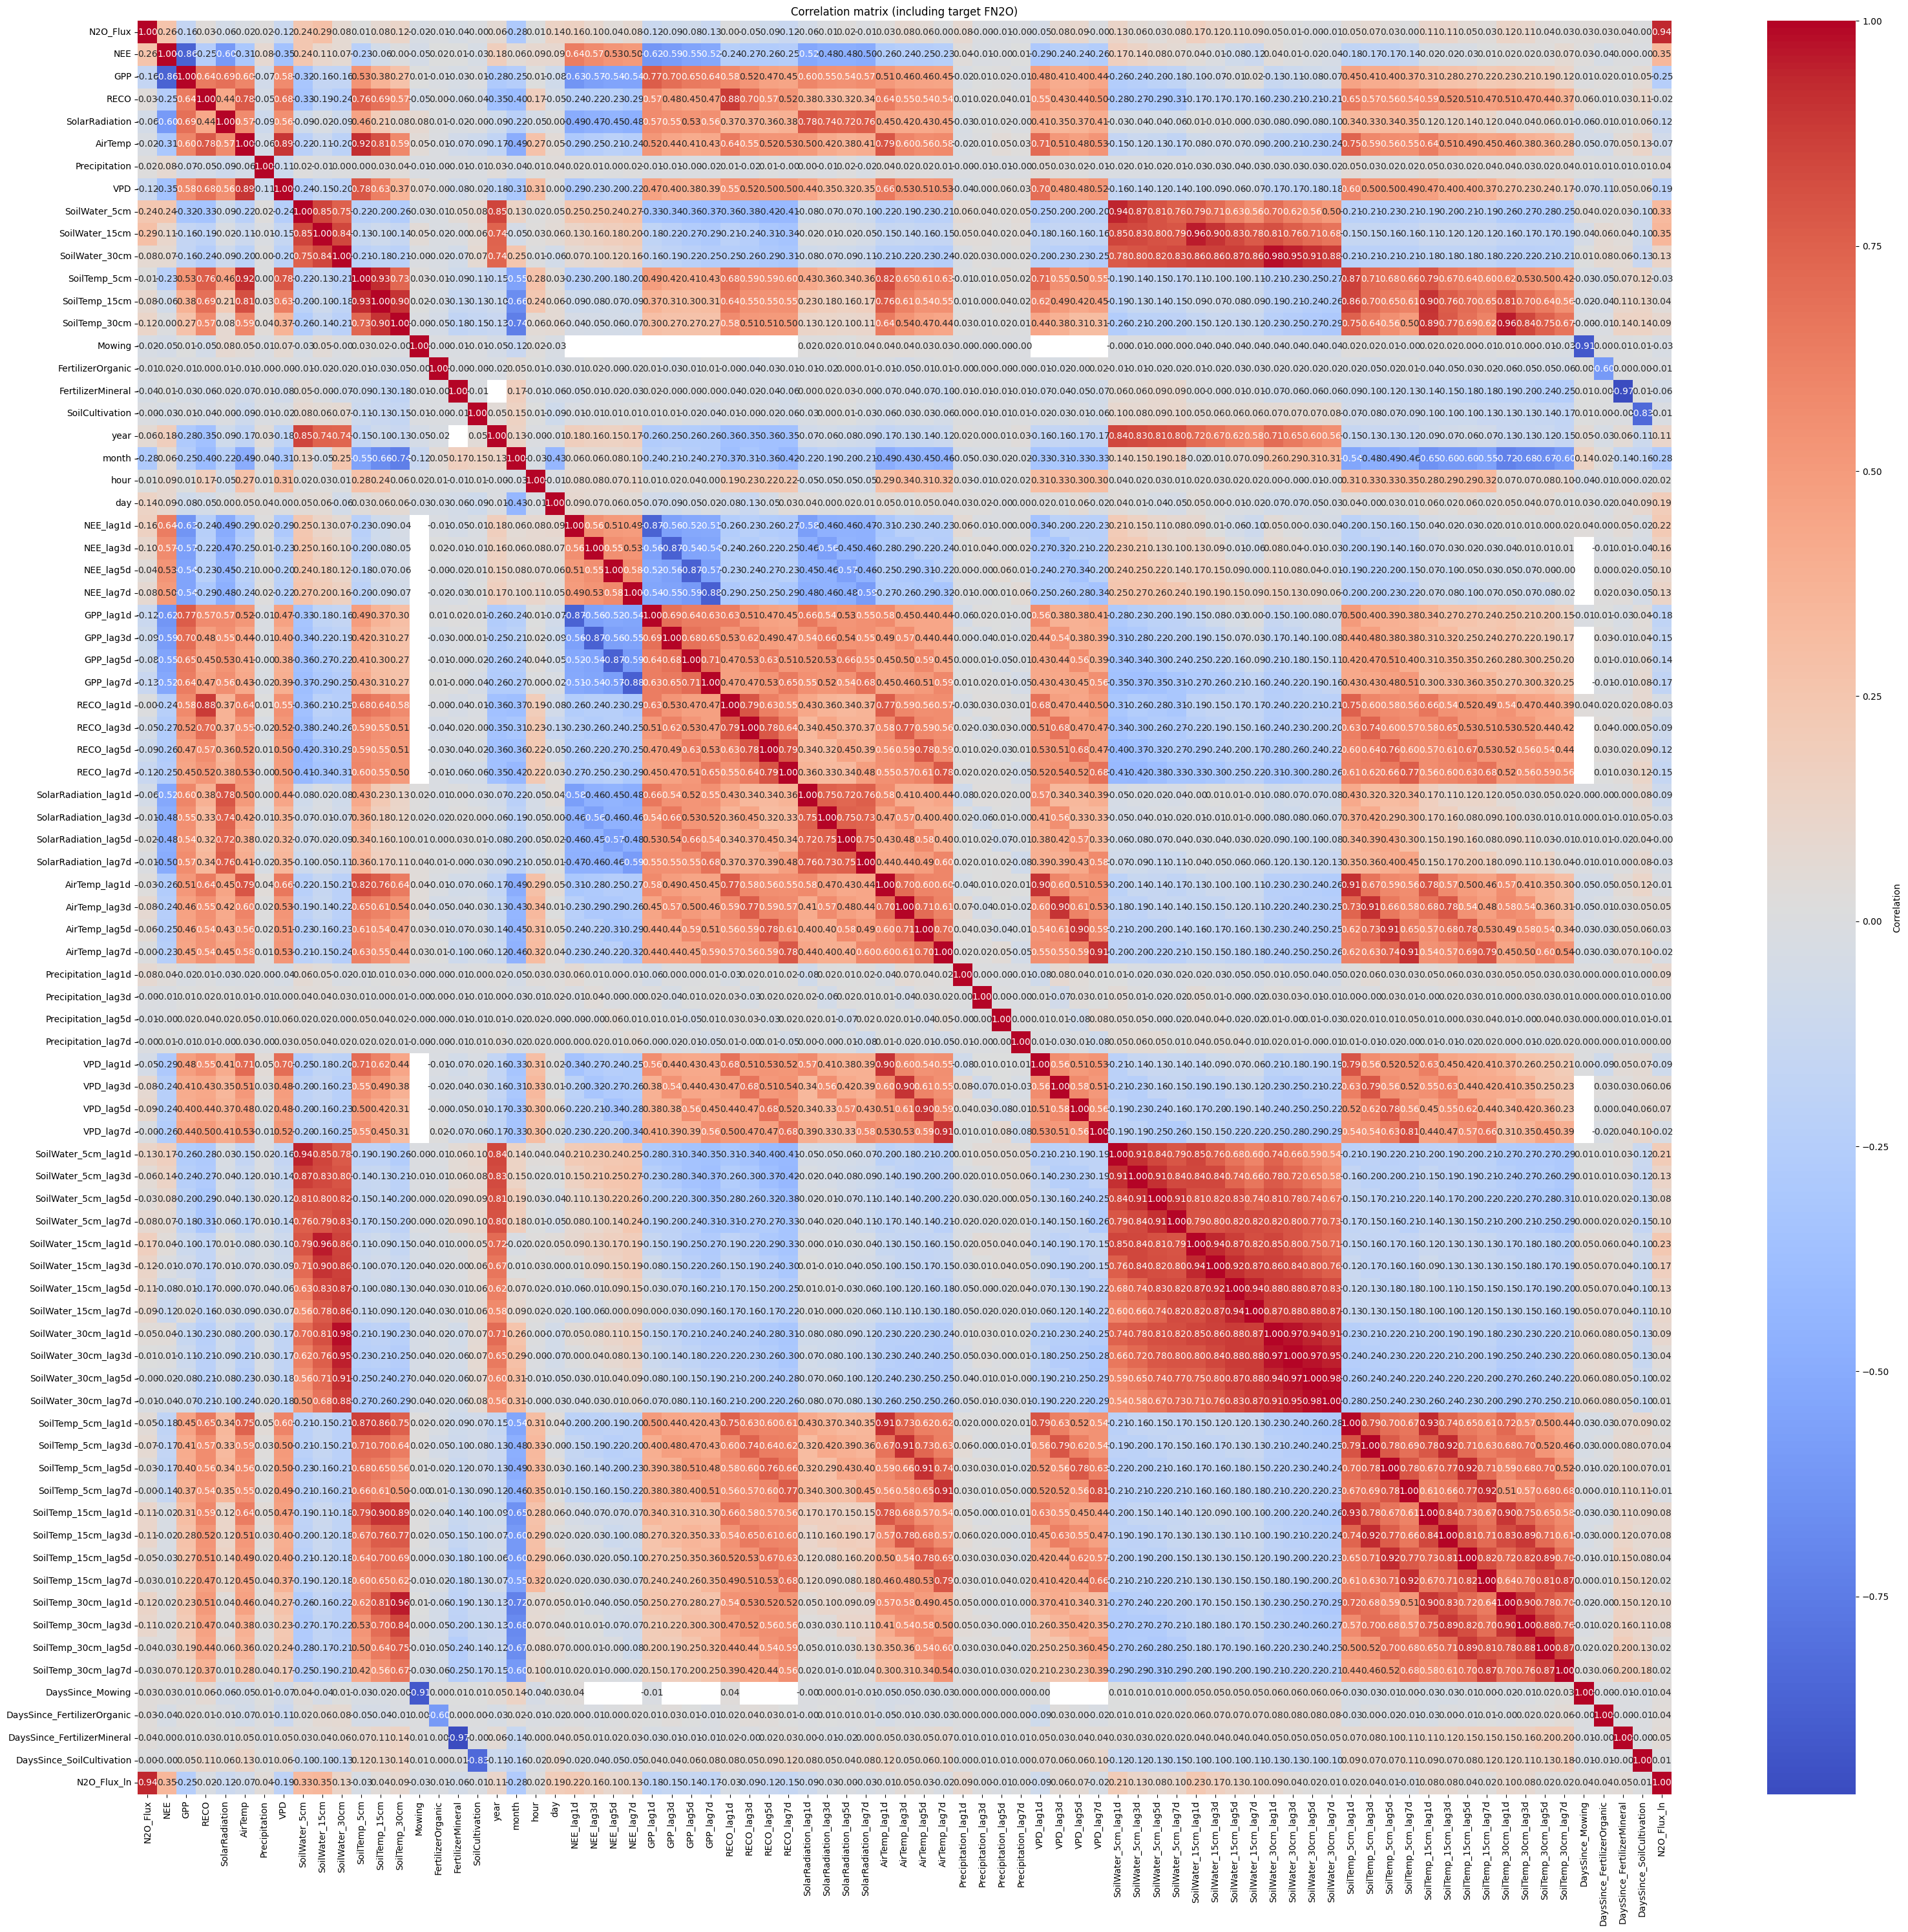

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (Pearson by default)
corr = oensingen_1.corr(numeric_only=True)

plt.figure(figsize=(32,30))
sns.heatmap(
    corr, 
    annot=True, fmt=".2f", cmap="coolwarm",
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation matrix (including target FN2O)")
plt.tight_layout()
plt.show()

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def plot_time_series(df, vars_to_plot):
    """
    Plot time series of selected variables with real time gaps shown on the x-axis.
    Automatically formats time labels and adds axis labels.
    """
    df = df.copy().sort_index()

    # --- Ensure datetime index ---
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # --- Layout ---
    n_cols = 3
    n_rows = int(len(vars_to_plot) / n_cols) + (len(vars_to_plot) % n_cols > 0)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharex=True)
    axes = axes.flatten()

    # --- Plot each variable ---
    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        ax.plot(df.index, df[var], lw=1)
        ax.set_title(var, fontsize=10)
        ax.set_ylabel(var)
        ax.grid(True, alpha=0.3)

        # Format the x-axis as dates
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
        ax.tick_params(axis='x', rotation=45)

    # --- Remove unused axes if any ---
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # --- Common labels and formatting ---
    fig.suptitle("Time Series", fontsize=14)
    fig.text(0.5, 0.04, "Date", ha='center', fontsize=12)
    fig.tight_layout(rect=[0, 0.05, 1, 0.97])
    plt.show()

Raw Data


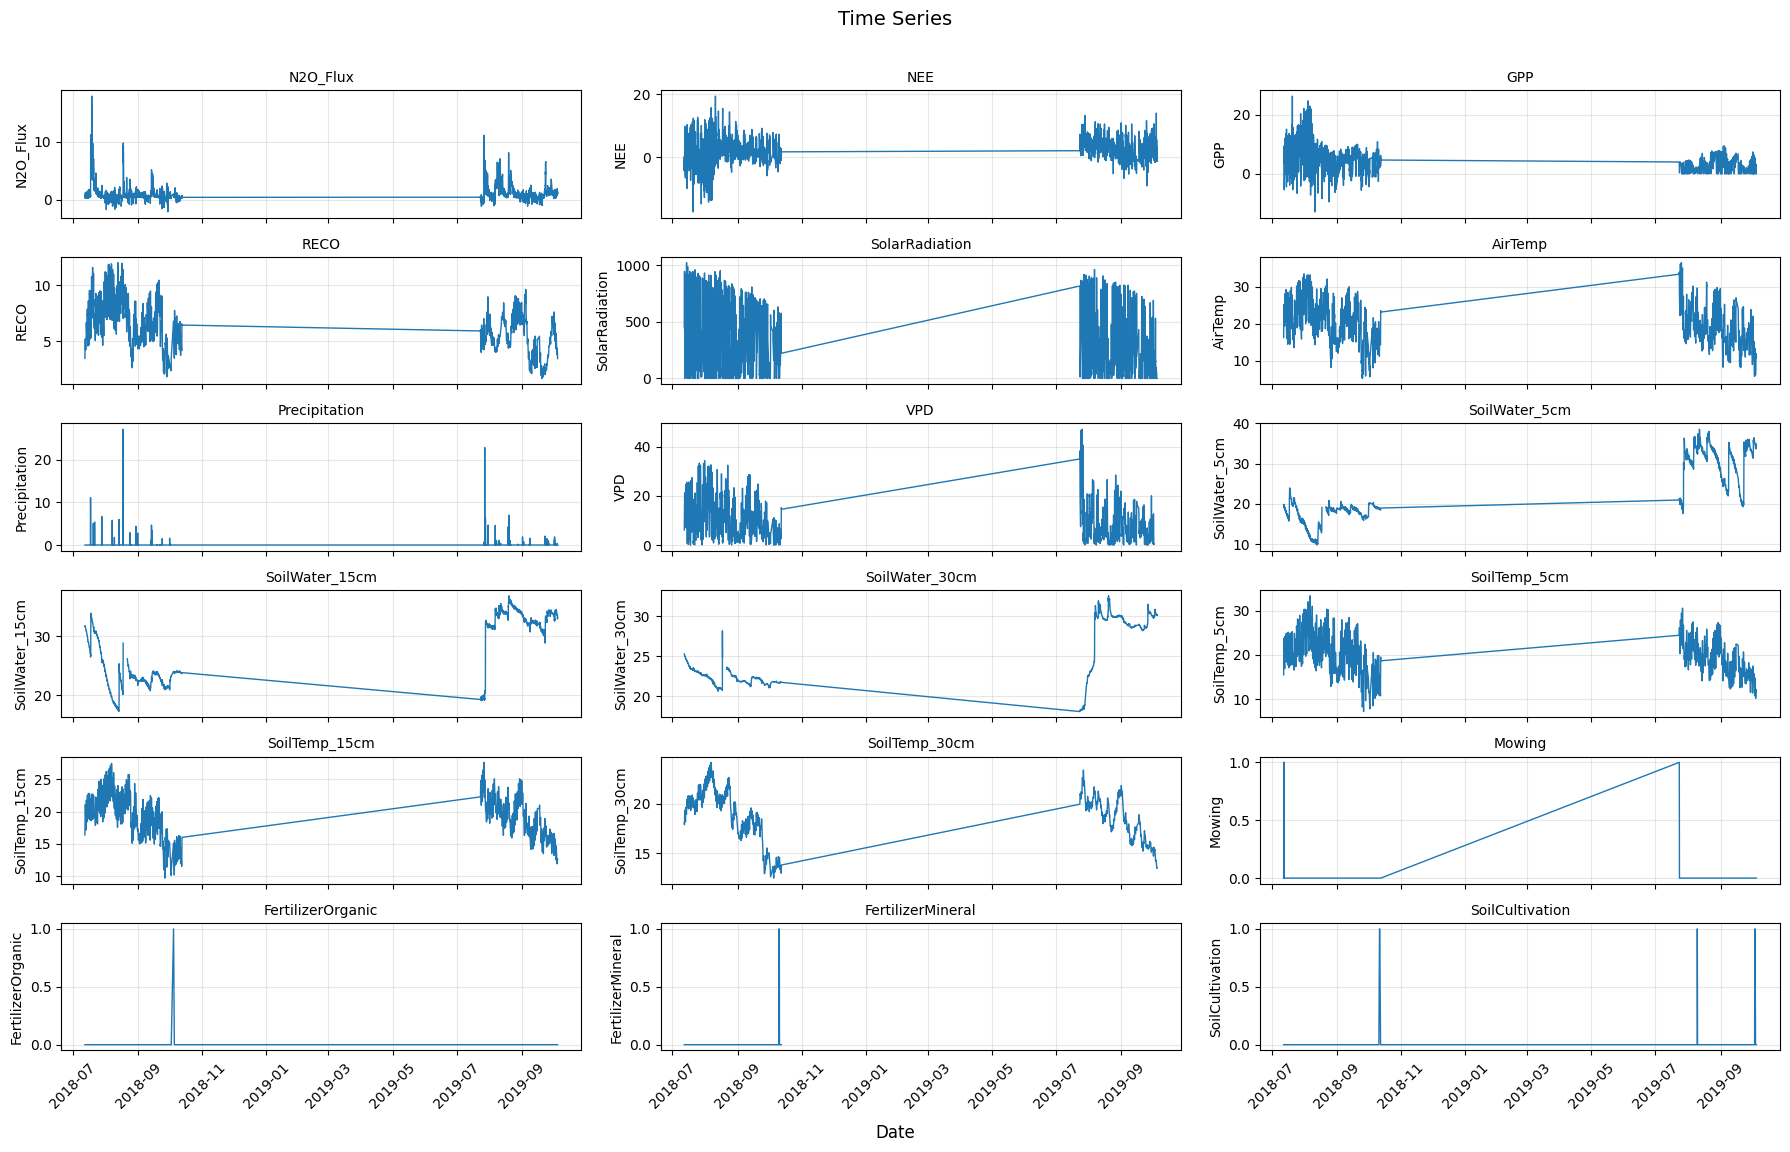

Daily Freq


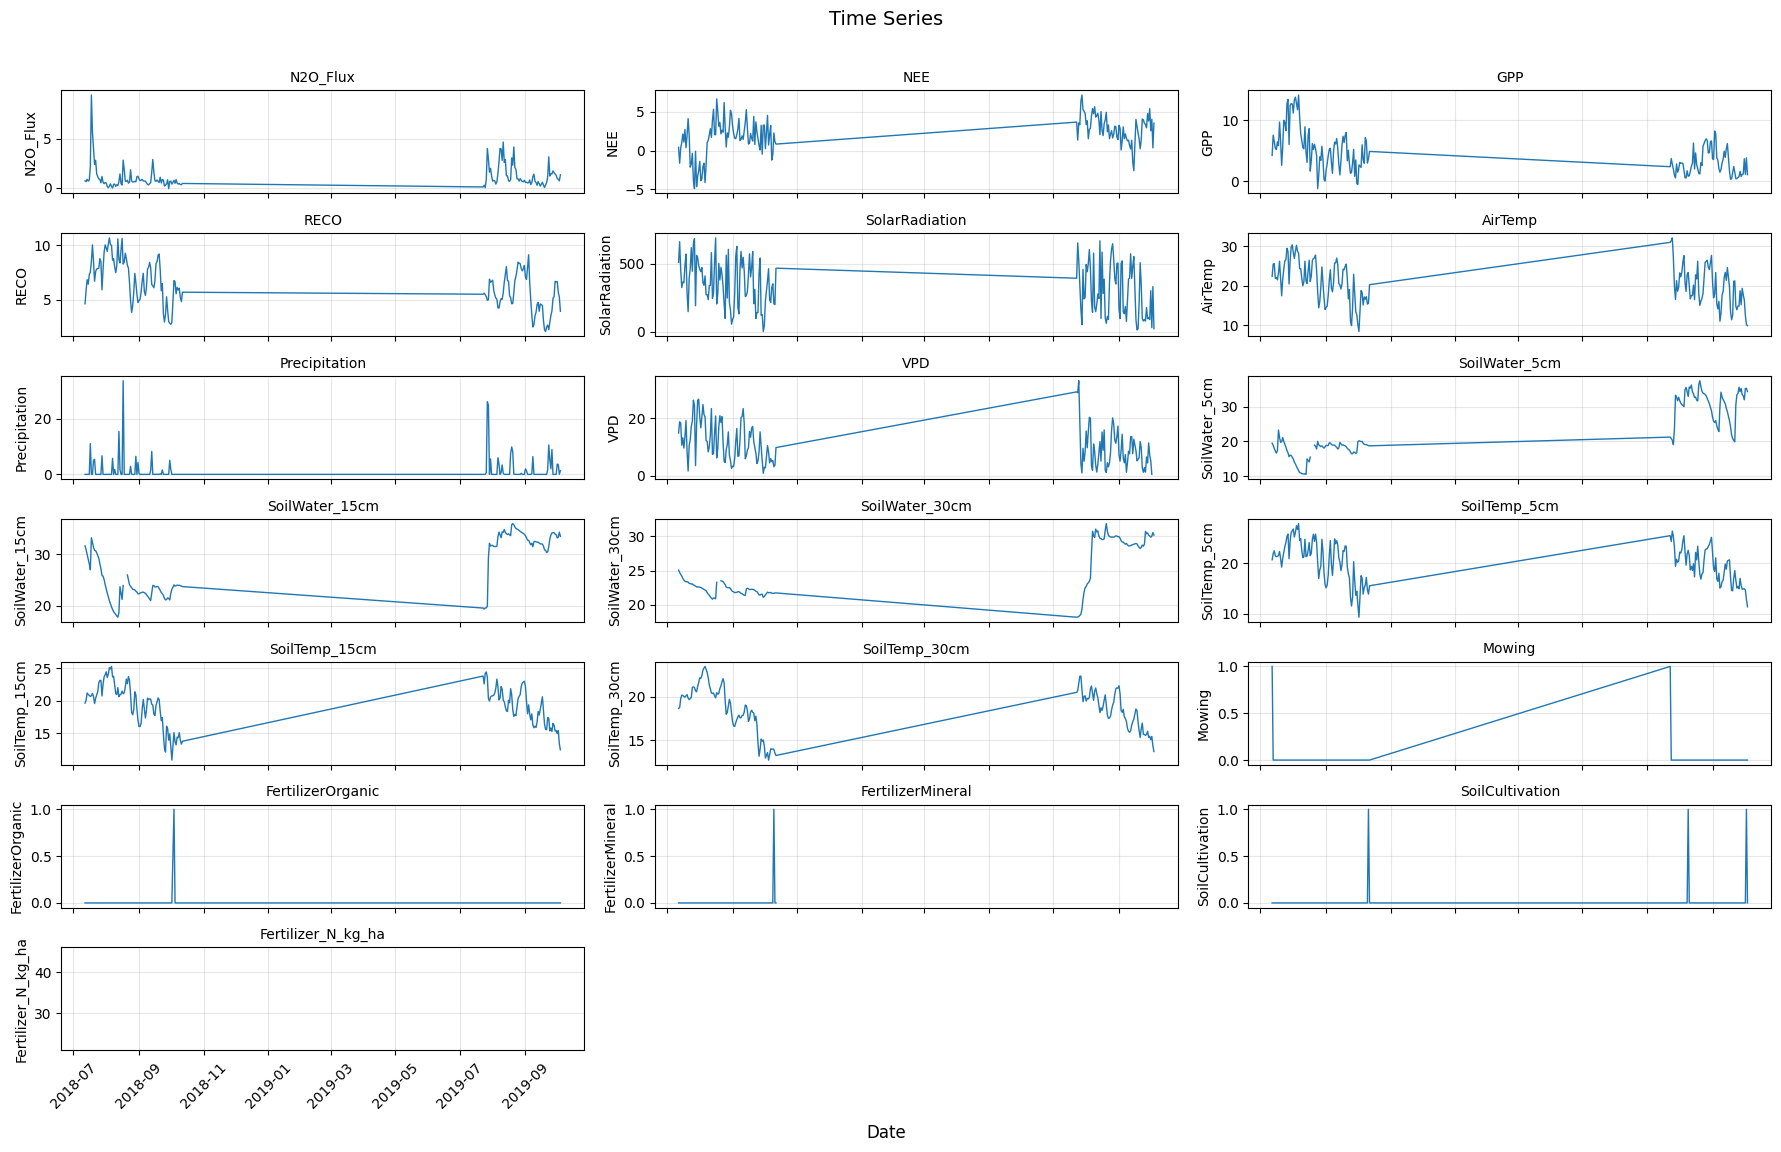

In [19]:
# Variables to plot (excluding Timestamp)
vars_to_plot = [
    "N2O_Flux", "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation",
    "VPD", "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation"
]

# Variables to plot (excluding Timestamp)
vars_to_plot_w_fert = [
    "N2O_Flux", "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation",
    "VPD", "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "Mowing", "FertilizerOrganic", "FertilizerMineral", "SoilCultivation", "Fertilizer_N_kg_ha"
]

# Daily averages
print("Raw Data")
plot_time_series(oensingen_1, vars_to_plot)
print("Daily Freq")
plot_time_series(oensingen_1_daily, vars_to_plot_w_fert)

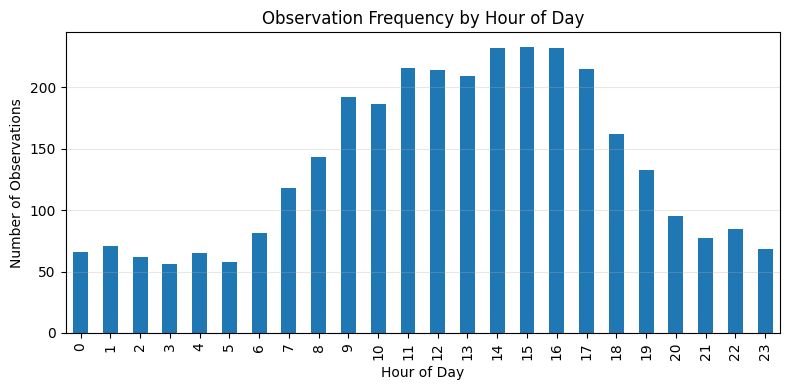

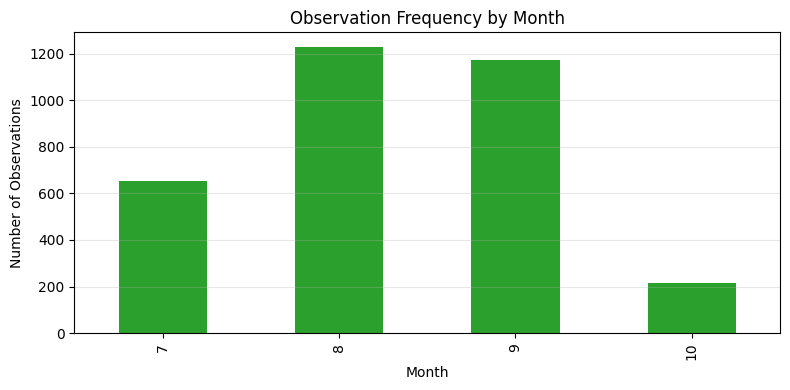

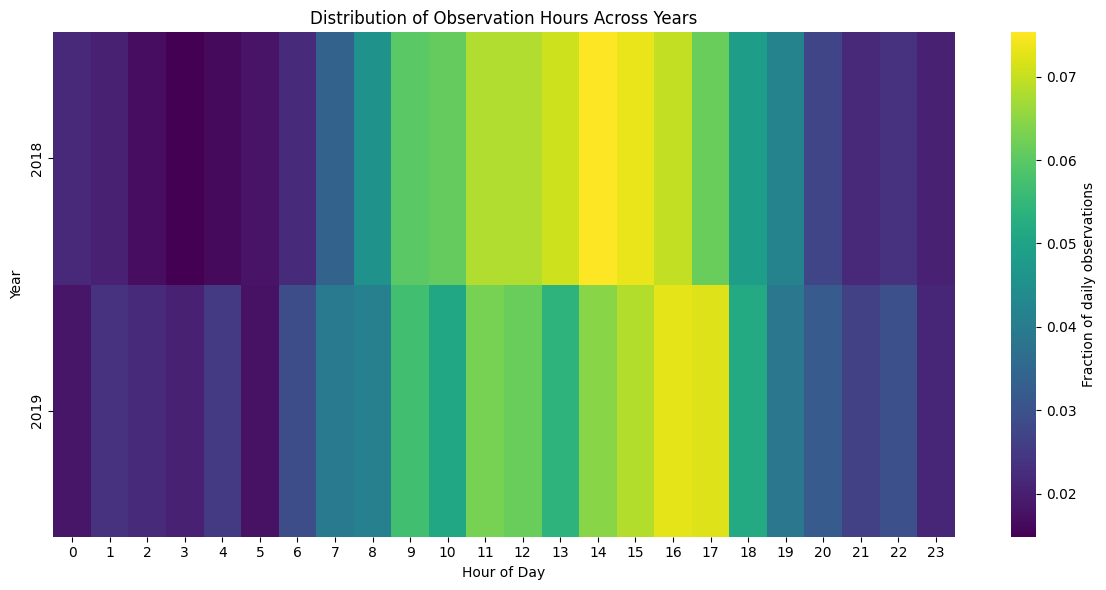

In [21]:
# count observations per hour
hourly_counts = oensingen_1["hour"].value_counts().sort_index()

# plot
plt.figure(figsize=(8,4))
hourly_counts.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Observations")
plt.title("Observation Frequency by Hour of Day")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# count per month
monthly_counts = oensingen_1["month"].value_counts().sort_index()

# plot
plt.figure(figsize=(8,4))
monthly_counts.plot(kind="bar", color="tab:green")
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.title("Observation Frequency by Month")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# group by year × hour
hour_year_counts = (
    oensingen_1.groupby(["year", "hour"])
    .size()
    .unstack(fill_value=0)
)

# normalize by total per year (to compare proportions)
hour_year_norm = hour_year_counts.div(hour_year_counts.sum(axis=1), axis=0)

# plot as heatmap
plt.figure(figsize=(12,6))
sns.heatmap(hour_year_norm, cmap="viridis", cbar_kws={"label": "Fraction of daily observations"})
plt.xlabel("Hour of Day")
plt.ylabel("Year")
plt.title("Distribution of Observation Hours Across Years")
plt.tight_layout()
plt.show()

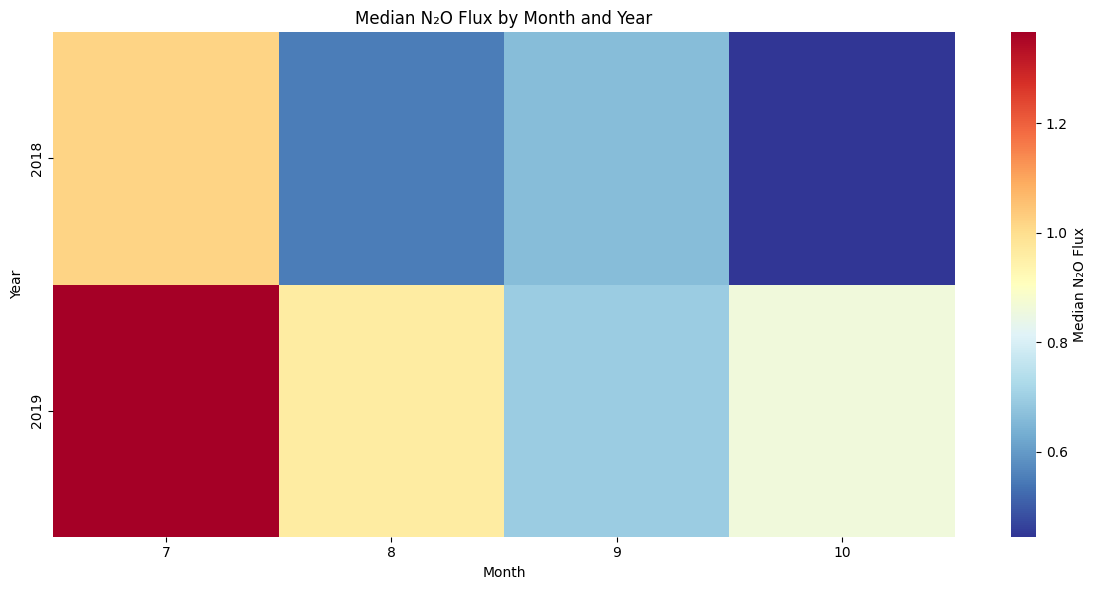

/var/folders/_3/dhm9h5w122sfbk56zms0llk00000gn/T/ipykernel_15136/3820657098.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  oensingen_1.groupby(["T5_bin", "T15_bin"])["N2O_Flux"]


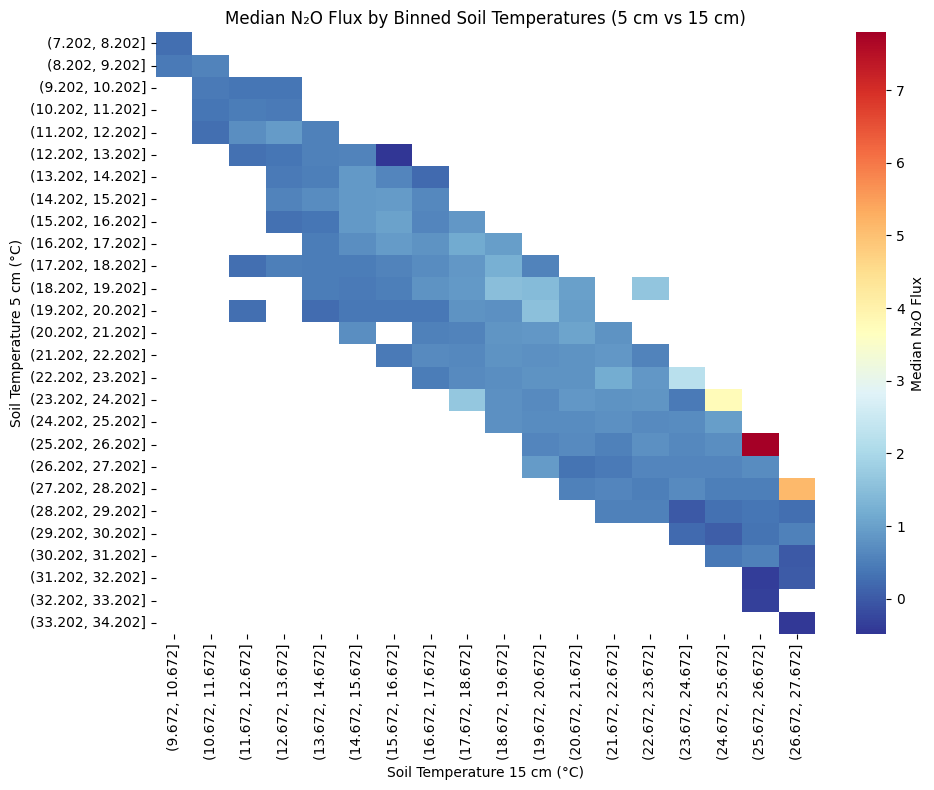

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# compute median N₂O flux per year × hour
median_flux = (
    oensingen_1.groupby(["year", "month"])["N2O_Flux"]
    .median()
    .unstack(fill_value=np.nan)
)

# plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    median_flux,
    cmap="RdYlBu_r",
    cbar_kws={"label": "Median N₂O Flux"},
)
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Median N₂O Flux by Month and Year")
plt.tight_layout()
plt.show()

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# define bin edges for both temperatures
bins_5cm = np.arange(oensingen_1["SoilTemp_5cm"].min(), oensingen_1["SoilTemp_5cm"].max()+1, 1)
bins_15cm = np.arange(oensingen_1["SoilTemp_15cm"].min(), oensingen_1["SoilTemp_15cm"].max()+1, 1)

# create binned categories
oensingen_1["T5_bin"] = pd.cut(oensingen_1["SoilTemp_5cm"], bins=bins_5cm)
oensingen_1["T15_bin"] = pd.cut(oensingen_1["SoilTemp_15cm"], bins=bins_15cm)

# compute median flux per 2D bin
median_flux_binned = (
    oensingen_1.groupby(["T5_bin", "T15_bin"])["N2O_Flux"]
    .median()
    .unstack(fill_value=np.nan)
)

# plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    median_flux_binned,
    cmap="RdYlBu_r",
    cbar_kws={"label": "Median N₂O Flux"},
)
plt.xlabel("Soil Temperature 15 cm (°C)")
plt.ylabel("Soil Temperature 5 cm (°C)")
plt.title("Median N₂O Flux by Binned Soil Temperatures (5 cm vs 15 cm)")
plt.tight_layout()
plt.show()

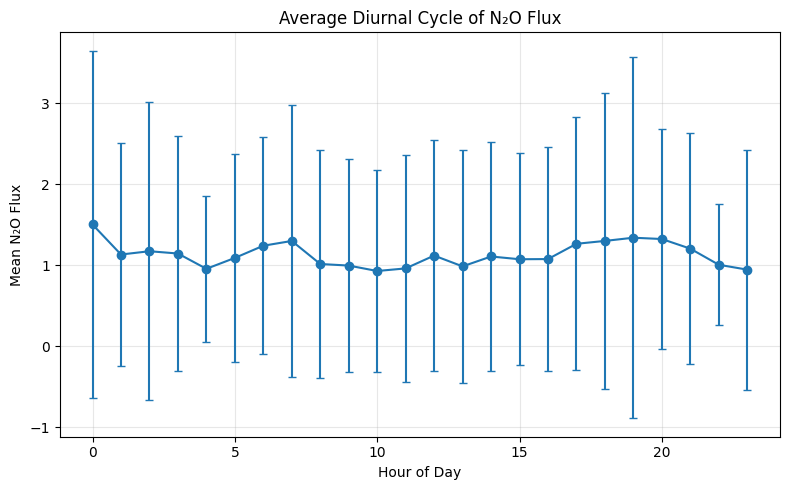

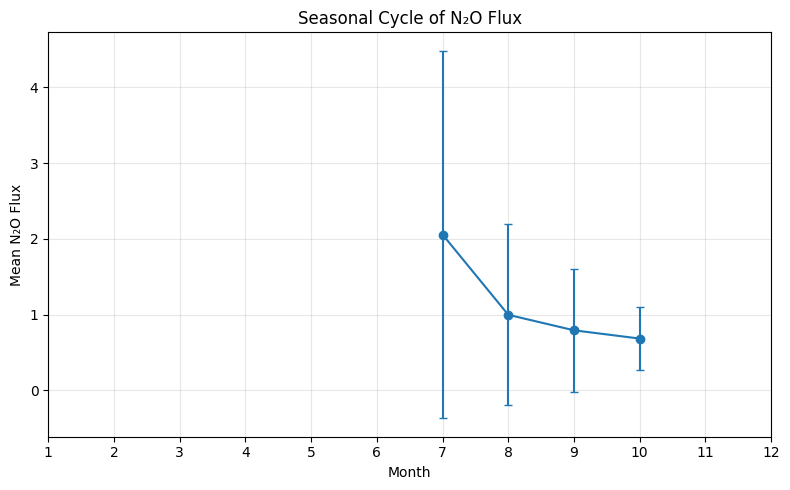

In [23]:
hourly_mean = oensingen_1.groupby("hour")["N2O_Flux"].mean()
hourly_std  = oensingen_1.groupby("hour")["N2O_Flux"].std()

plt.figure(figsize=(8, 5))
plt.errorbar(hourly_mean.index, hourly_mean, yerr=hourly_std, fmt="-o", capsize=3)
plt.xlabel("Hour of Day")
plt.ylabel("Mean N₂O Flux")
plt.title("Average Diurnal Cycle of N₂O Flux")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

monthly_mean = oensingen_1.groupby("month")["N2O_Flux"].mean()
monthly_std  = oensingen_1.groupby("month")["N2O_Flux"].std()

plt.figure(figsize=(8, 5))
plt.errorbar(monthly_mean.index, monthly_mean, yerr=monthly_std, fmt="-o", capsize=3)
plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Mean N₂O Flux")
plt.title("Seasonal Cycle of N₂O Flux")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

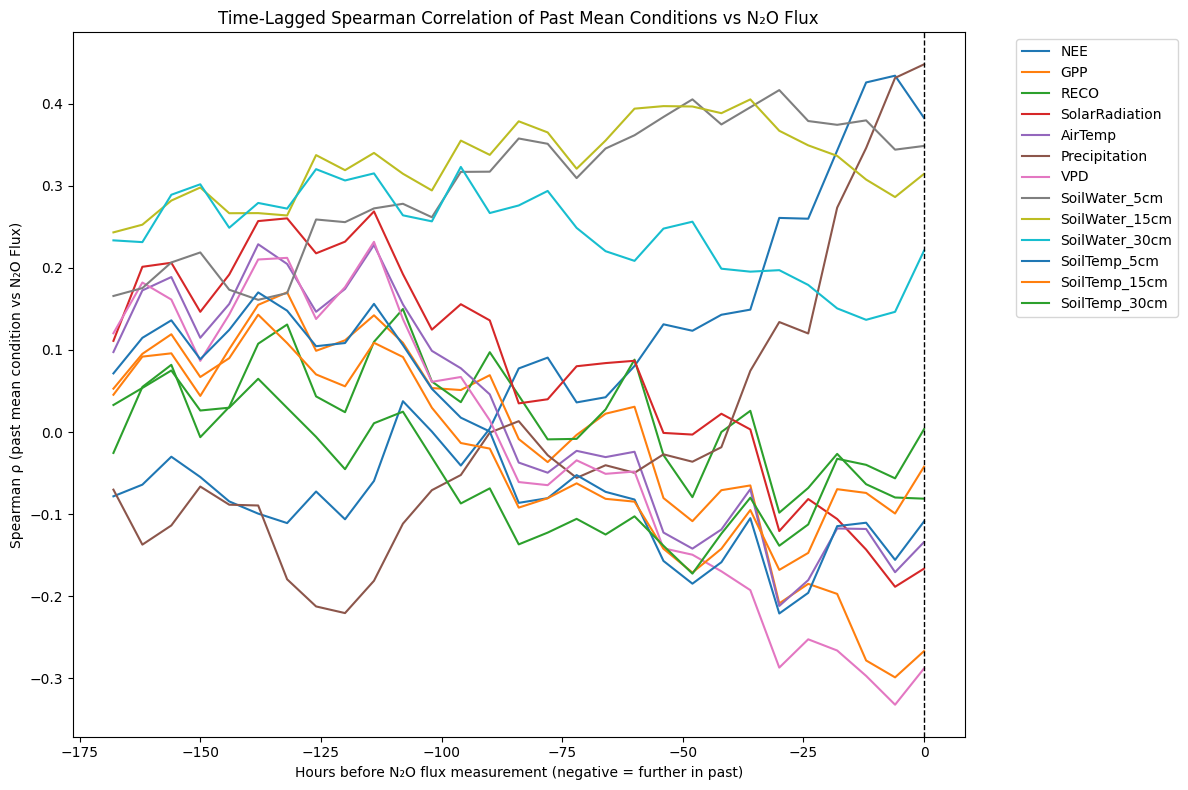

In [24]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Base setup ---
oensingen_1_time_index = oensingen_1.copy()

predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
]

target = "N2O_Flux"

# --- Parameters ---
window_hours = 24        # window size for averaging (past 24h)
step_hours   = 6        # step between lags
max_hours    = 7 * 24    # look back 1 week (you can extend to 5 weeks)
offsets      = range(0, -max_hours - step_hours, -step_hours)  # only past (0, -24, -48, ...)

# --- Rolling mean of predictors (24h backward window) ---
window = f"{window_hours}h"
rolling_means = oensingen_1_time_index[predictors].rolling(window=window, closed="left").mean()

# --- Compute lag correlations (Spearman) ---
lag_corrs = {}

for var in predictors:
    corrs = []
    for offset in offsets:
        shifted = rolling_means[var].shift(freq=pd.Timedelta(hours=offset))
        aligned = oensingen_1_time_index[[target]].join(shifted.rename("past_mean")).dropna()
        if len(aligned) > 2:
            rho, _ = spearmanr(aligned[target], aligned["past_mean"])
            corrs.append(rho)
        else:
            corrs.append(np.nan)
    lag_corrs[var] = (list(offsets), corrs)

# --- Plot results ---
plt.figure(figsize=(12, 8))
for var, (offsets, corrs) in lag_corrs.items():
    plt.plot(offsets, corrs, label=var)

plt.axvline(0, color="k", linestyle="--", lw=1)
plt.xlabel("Hours before N₂O flux measurement (negative = further in past)")
plt.ylabel("Spearman ρ (past mean condition vs N₂O Flux)")
plt.title("Time-Lagged Spearman Correlation of Past Mean Conditions vs N₂O Flux")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

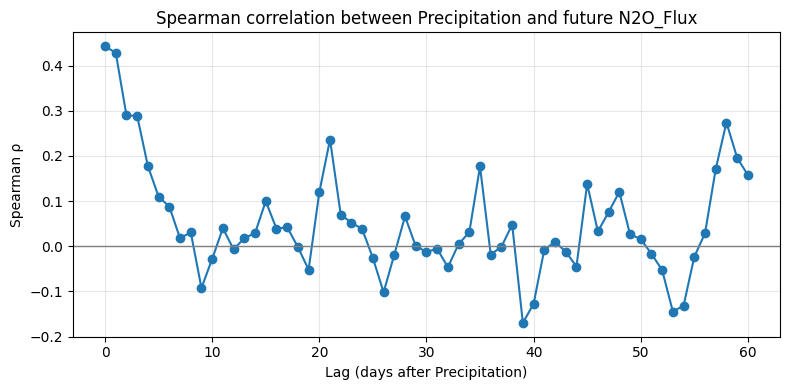

Peak Spearman correlation at lag = 0 days (ρ = 0.443)


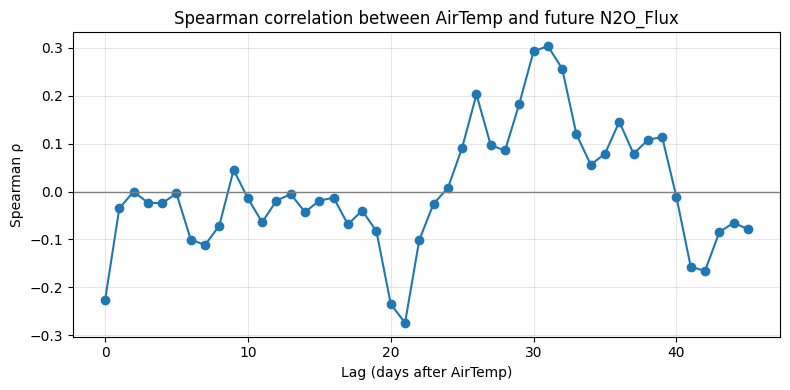

Peak Spearman correlation at lag = 31 days (ρ = 0.304)


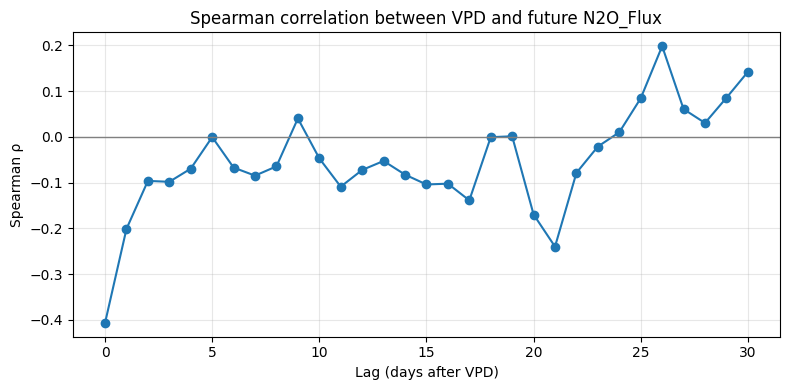

Peak Spearman correlation at lag = 26 days (ρ = 0.198)


In [25]:
from scipy.stats import spearmanr

def plot_lag_correlation(df, col, target="N2O_Flux", max_lag=60, resample_daily=True):
    """
    Compute and plot the Spearman correlation between a predictor and target variable
    over increasing day lags (calendar-based).

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with a DatetimeIndex.
    col : str
        Column name of the predictor variable (e.g. "Precipitation").
    target : str, optional
        Column name of the target variable, by default "N2O_Flux".
    max_lag : int, optional
        Maximum lag in days, by default 60.
    resample_daily : bool, optional
        If True, resample to daily mean (useful if data is sub-daily).

    Returns
    -------
    pd.DataFrame
        DataFrame with 'lag' and 'spearman_r' for each lag.
    """

    # --- Ensure datetime index ---
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # --- Optional daily resampling ---
    if resample_daily:
        df = df.select_dtypes(include=[np.number]).resample("D").mean()

    # --- Filter for valid positive flux values ---
    df = df[df[target] >= 0][[col, target]].dropna(subset=[target])

    # --- Compute lag correlations ---
    lags = np.arange(0, max_lag + 1)
    corrs = []

    for lag in lags:
        shifted = df[col].shift(freq=pd.to_timedelta(lag, unit="D"))
        aligned = pd.concat([df[target], shifted], axis=1, join="inner").dropna()

        if aligned.empty:
            corrs.append(np.nan)
        else:
            r, _ = spearmanr(aligned[target], aligned[col])
            corrs.append(r)

    # --- Store results ---
    result = pd.DataFrame({"lag_days": lags, "spearman_r": corrs})

    # --- Plot ---
    plt.figure(figsize=(8, 4))
    plt.plot(result["lag_days"], result["spearman_r"], marker="o", color="tab:blue")
    plt.axhline(0, color="gray", lw=1)
    plt.xlabel(f"Lag (days after {col})")
    plt.ylabel("Spearman ρ")
    plt.title(f"Spearman correlation between {col} and future {target}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- Report peak correlation ---
    best_lag = result["lag_days"].iloc[np.nanargmax(result["spearman_r"])]
    best_r = np.nanmax(result["spearman_r"])
    print(f"Peak Spearman correlation at lag = {best_lag} days (ρ = {best_r:.3f})")

plot_lag_correlation(oensingen_1, col="Precipitation", max_lag=60)
plot_lag_correlation(oensingen_1, col="AirTemp", max_lag=45)
plot_lag_correlation(oensingen_1, col="VPD", max_lag=30)

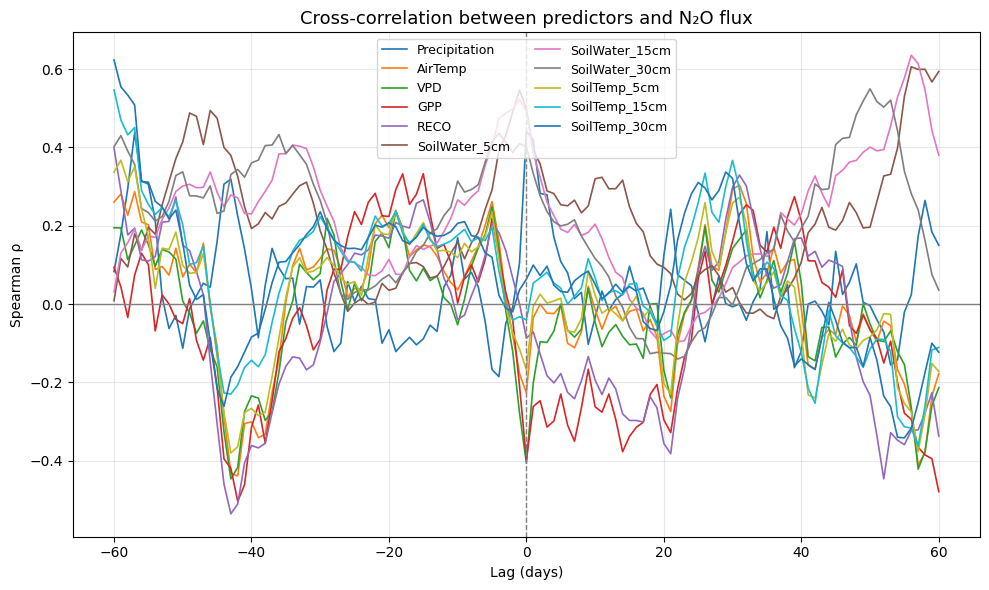

          Variable  Best lag (days)  Max corr (ρ)
6   SoilWater_15cm               56         0.635
10   SoilTemp_30cm              -60         0.623
5    SoilWater_5cm               56         0.606
7   SoilWater_30cm               50         0.550
9    SoilTemp_15cm              -60         0.547
4             RECO              -43        -0.536
3              GPP              -42        -0.504
2              VPD              -43        -0.447
0    Precipitation                0         0.440
1          AirTemp              -42        -0.439
8     SoilTemp_5cm              -43        -0.380


In [26]:
def cross_correlation_single(df, predictor_vars, target="N2O_Flux", max_lag=60):
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        if "Date" in df.columns:
            df["Date"] = pd.to_datetime(df["Date"])
            df = df.set_index("Date")
        else:
            raise ValueError("DataFrame must have a DatetimeIndex or 'Date' column")

    df = df[df[target] >= 0].dropna(subset=[target])
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    predictor_vars = [v for v in predictor_vars if v in numeric_cols]
    lags = np.arange(-max_lag, max_lag + 1)
    
    # Sort by index
    df = df.sort_index()
    corrs_dict = {}

    # Compute correlations for each predictor
    for var in predictor_vars:
        corrs = []
        for lag in lags:
            shifted = df[var].shift(freq=pd.to_timedelta(lag, unit="D"))
            aligned = pd.concat([df[target], shifted], axis=1, join="inner").dropna()
            rho = np.nan if aligned.empty else spearmanr(aligned[target], aligned[var])[0]
            corrs.append(rho)
        corrs_dict[var] = corrs

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for var, corrs in corrs_dict.items():
        ax.plot(lags, corrs, lw=1.2, label=var)

    ax.axhline(0, color="gray", lw=1)
    ax.axvline(0, color="gray", lw=1, ls="--")
    ax.set_xlabel("Lag (days)")
    ax.set_ylabel("Spearman ρ")
    ax.set_title("Cross-correlation between predictors and N₂O flux", fontsize=13)
    ax.grid(True, alpha=0.3)
    ax.legend(loc="best", ncol=2, fontsize=9)
    plt.tight_layout()
    plt.show()

    # --- Summary ---
    summary_rows = []
    for var, corrs in corrs_dict.items():
        best_idx = np.nanargmax(np.abs(corrs))
        summary_rows.append({
            "Variable": var,
            "Best lag (days)": int(lags[best_idx]),
            "Max corr (ρ)": corrs[best_idx],
        })

    summary_df = pd.DataFrame(summary_rows)
    summary_df = (
        summary_df
        .sort_values(
            by="Max corr (ρ)",
            ascending=False,
            key=lambda col: np.abs(col) if col.name == "Max corr (ρ)" else col
        )
        .round(3)
    )

    return summary_df

predictors = [
    "Precipitation", "AirTemp", "VPD", "GPP", "RECO",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm"
]

summary = cross_correlation_single(oensingen_1_daily, predictor_vars=predictors, max_lag=60)
print(summary)

Found 2 fertilization events


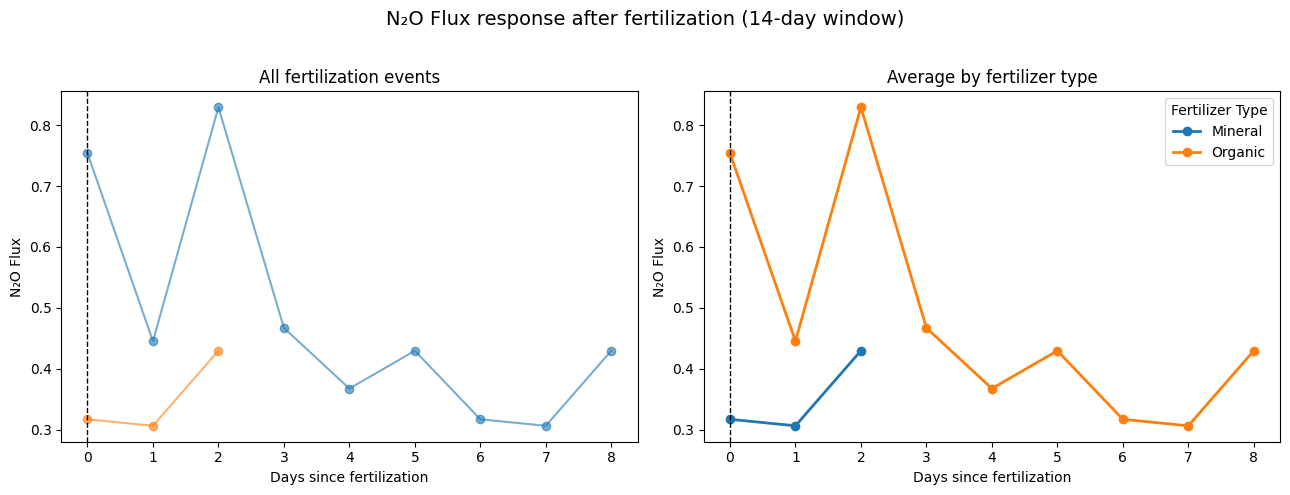

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Identify fertilization events ---
fert_events = oensingen_1_daily[
    (oensingen_1_daily["FertilizerOrganic"] == 1) |
    (oensingen_1_daily["FertilizerMineral"] == 1)
].copy()

# Date is already the index, so we'll work with that
print(f"Found {len(fert_events)} fertilization events")

# --- Extract N₂O fluxes for 14 days after each event ---
window_days = 14
records = []

for event_date, event in fert_events.iterrows():
    # event_date is already a datetime since it's the index
    subset = oensingen_1_daily[
        (oensingen_1_daily.index >= event_date) &
        (oensingen_1_daily.index <= event_date + pd.Timedelta(days=window_days))
    ].copy()
    
    subset["days_since_fert"] = (subset.index - event_date).days
    subset["event_date"] = event_date
    subset["fert_type"] = (
        "Organic" if event["FertilizerOrganic"] == 1 else "Mineral"
    )
    records.append(subset)

fert_windows = pd.concat(records, ignore_index=False)

# --- Plot setup (1x2 grid) ---
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle("N₂O Flux response after fertilization (14-day window)", fontsize=14)

# --- Panel 1: All individual events ---
for event_date, group in fert_windows.groupby("event_date"):
    axes[0].plot(group["days_since_fert"], group["N2O_Flux"], marker="o", alpha=0.6)
axes[0].axvline(0, color="black", linestyle="--", linewidth=1)
axes[0].set_title("All fertilization events")
axes[0].set_xlabel("Days since fertilization")
axes[0].set_ylabel("N₂O Flux")

# --- Panel 2: Average by fertilizer type ---
for fert_type, group in fert_windows.groupby("fert_type"):
    mean_curve = group.groupby("days_since_fert")["N2O_Flux"].mean()
    axes[1].plot(mean_curve.index, mean_curve.values, marker="o", label=fert_type, linewidth=2)
axes[1].axvline(0, color="black", linestyle="--", linewidth=1)
axes[1].set_title("Average by fertilizer type")
axes[1].set_xlabel("Days since fertilization")
axes[1].set_ylabel("N₂O Flux")
axes[1].legend(title="Fertilizer Type")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

/var/folders/_3/dhm9h5w122sfbk56zms0llk00000gn/T/ipykernel_15136/1228196190.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.07, 1, 0.96])


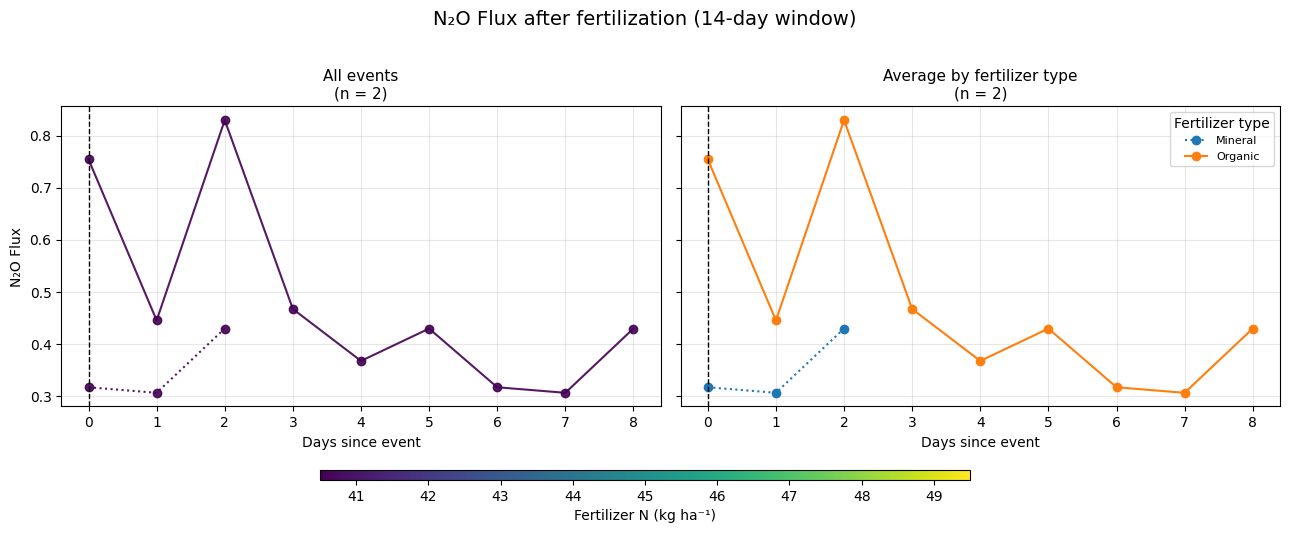

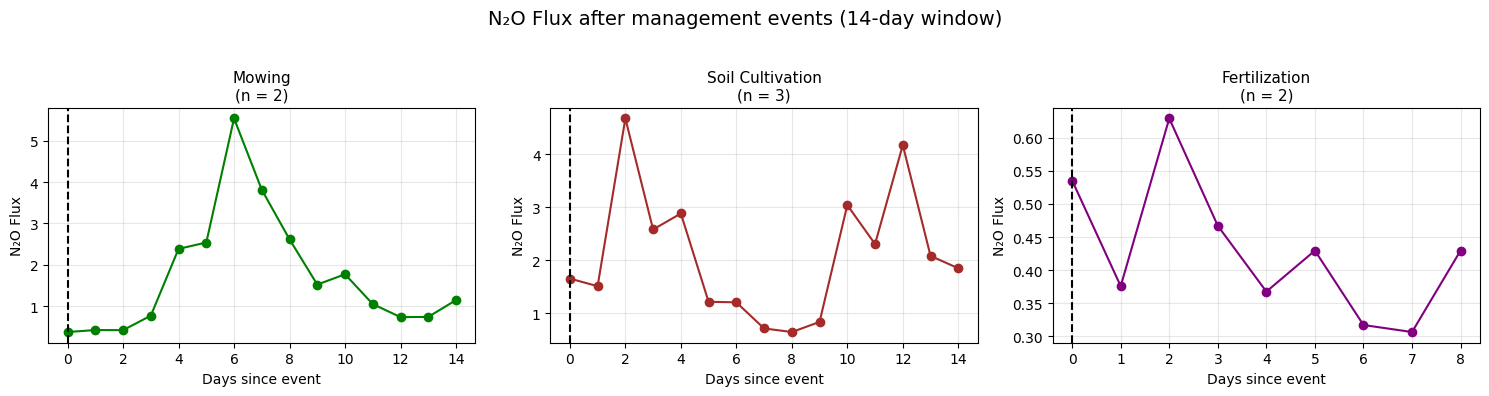

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# ==========================================================
# 1️⃣ Helper: extract N₂O flux windows after each management event
# ==========================================================
def extract_event_windows(df_daily, event_col, window_days=14):
    """
    Extract N₂O flux time windows following a management event.

    Args:
        df_daily : daily dataframe (must have Date as index, N2O_Flux, and event_col)
        event_col : column name for event (e.g., "Mowing")
        window_days : number of days after event to include
    """
    records = []
    events = df_daily[df_daily[event_col] == 1].copy()
    if events.empty:
        return pd.DataFrame()

    for event_date, event in events.iterrows():
        subset = df_daily[
            (df_daily.index >= event_date) &
            (df_daily.index <= event_date + pd.Timedelta(days=window_days))
        ].copy()

        subset["days_since_event"] = (subset.index - event_date).days
        subset["event_date"] = event_date
        subset["event_type"] = event_col  # keep event label
        records.append(subset)

    return pd.concat(records, ignore_index=False)


# ==========================================================
# 2️⃣ Create windows for each management type
# ==========================================================
mow_windows   = extract_event_windows(oensingen_1_daily, "Mowing")
cult_windows  = extract_event_windows(oensingen_1_daily, "SoilCultivation")
fert_windows  = extract_event_windows(oensingen_1_daily, "FertilizerOrganic")
fert_windowsM = extract_event_windows(oensingen_1_daily, "FertilizerMineral")

# merge organic + mineral
fert_windows["event_type"] = "Organic"
fert_windowsM["event_type"] = "Mineral"
fert_windows = pd.concat([fert_windows, fert_windowsM], ignore_index=False)

# Add fertilizer amount (if available)
if "Fertilizer_N_kg_ha" not in fert_windows.columns:
    fert_windows["Fertilizer_N_kg_ha"] = 0.0

# ==========================================================
# 3️⃣ Fertilization plots
# ==========================================================
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
fig.suptitle("N₂O Flux after fertilization (14-day window)", fontsize=14)

# normalize fertilizer N for color mapping
norm = mcolors.Normalize(
    vmin=fert_windows["Fertilizer_N_kg_ha"].min(),
    vmax=fert_windows["Fertilizer_N_kg_ha"].max()
)
cmap = cm.viridis


def plot_fert_events(ax, df, title):
    if df.empty:
        ax.set_title(f"{title}\n(no events)", fontsize=10)
        return

    n_total = df["event_date"].nunique()

    for event_date, group in df.groupby("event_date"):
        n_val = group["Fertilizer_N_kg_ha"].iloc[0]
        fert_type = group["event_type"].iloc[0]
        color = cmap(norm(n_val))
        linestyle = "-" if "Organic" in fert_type else ":"
        ax.plot(
            group["days_since_event"], group["N2O_Flux"],
            color=color, linestyle=linestyle, marker="o", alpha=0.9
        )

    ax.axvline(0, color="black", linestyle="--", linewidth=1)
    ax.set_title(f"{title}\n(n = {n_total})", fontsize=11)
    ax.set_xlabel("Days since event")
    ax.set_ylabel("N₂O Flux")
    ax.grid(True, alpha=0.3)


# (a) All events
plot_fert_events(axes[0], fert_windows, "All events")

# (b) Average by fertilizer type
ax = axes[1]
for event_type, group in fert_windows.groupby("event_type"):
    mean_curve = group.groupby("days_since_event")["N2O_Flux"].mean()
    linestyle = "-" if "Organic" in event_type else ":"
    ax.plot(mean_curve.index, mean_curve.values,
            marker="o", label=event_type, linestyle=linestyle)
n_total = fert_windows["event_date"].nunique()
ax.axvline(0, color="black", linestyle="--", linewidth=1)
ax.set_title(f"Average by fertilizer type\n(n = {n_total})", fontsize=11)
ax.set_xlabel("Days since event")
ax.legend(title="Fertilizer type", fontsize=8)
ax.grid(True, alpha=0.3)

# colorbar
cbar_ax = fig.add_axes([0.25, 0.04, 0.5, 0.02])
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = fig.colorbar(sm, cax=cbar_ax, orientation="horizontal")
cbar.set_label("Fertilizer N (kg ha⁻¹)")

plt.tight_layout(rect=[0, 0.07, 1, 0.96])
plt.show()

# ==========================================================
# 4️⃣ Management event plots
# ==========================================================
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)
fig.suptitle("N₂O Flux after management events (14-day window)", fontsize=14)

management_panels = [
    (mow_windows, "Mowing", "green"),
    (cult_windows, "Soil Cultivation", "brown"),
    (fert_windows, "Fertilization", "purple")
]

for ax, (df, label, color) in zip(axes, management_panels):
    if df.empty:
        ax.set_title(f"{label}\n(no events)", fontsize=10)
        continue

    n_total = df["event_date"].nunique()

    mean_curve = df.groupby("days_since_event")["N2O_Flux"].mean()
    ax.plot(
        mean_curve.index, mean_curve.values,
        marker="o", color=color, linestyle="-"
    )

    ax.axvline(0, color="black", linestyle="--")
    ax.set_title(f"{label}\n(n = {n_total})", fontsize=11)
    ax.set_xlabel("Days since event")
    ax.set_ylabel("N₂O Flux")
    ax.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Oensingen 2021-23

# PCA plots

## Oensingen 2018-19

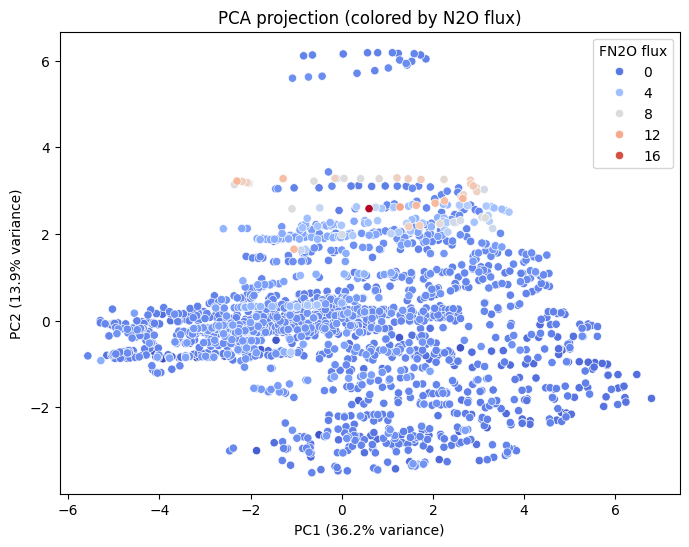

In [12]:
oensingen_1_clean = oensingen_1.dropna()
oensingen_1_clean = oensingen_1_clean.sort_values(
    by="N2O_Flux",
    ascending=True  # ascending puts zeros first, descending puts them last
)

X_1 = oensingen_1_clean.drop(columns=["N2O_Flux", "Timestamp", "time_diff", "Date"])
y_1 = oensingen_1_clean["N2O_Flux"]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize predictors
X_scaled_1 = StandardScaler().fit_transform(X_1)

# Run PCA (2 components for visualization)
pca_1 = PCA(n_components=2)
X_pca_1 = pca_1.fit_transform(X_scaled_1)

# Create DataFrame for plotting
pca_df_1 = pd.DataFrame(X_pca_1, columns=['PC1', 'PC2'])
pca_df_1["FN2O"] = y_1.values

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df_1, x="PC1", y="PC2", hue="FN2O", palette="coolwarm")
plt.title("PCA projection (colored by N2O flux)")
plt.xlabel(f"PC1 ({pca_1.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca_1.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="FN2O flux", loc="best")
plt.show()

In [37]:
loadings = pd.DataFrame(
    pca_1.components_.T,
    index=X_1.columns,
    columns=["PC1", "PC2"]
)
print(loadings.sort_values("PC1", ascending=False))

                        PC1       PC2
AirTemp            0.384823  0.030992
SoilTemp_5cm       0.382088 -0.013489
RECO               0.365963 -0.096313
SoilTemp_15cm      0.359145 -0.021056
VPD                0.345937  0.013855
GPP                0.317215 -0.012768
SoilTemp_30cm      0.287082 -0.059358
SolarRadiation     0.250722  0.108623
SoilWater_30cm     0.096647  0.542674
SoilWater_15cm     0.049613  0.598632
Mowing             0.010846  0.262801
Precipitation     -0.011927  0.014408
FertilizerOrganic -0.012660  0.007222
SoilCultivation   -0.037320  0.001499
FertilizerMineral -0.045482  0.000346
SoilWater_5cm     -0.133067  0.500169
NEE               -0.209857 -0.033324


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


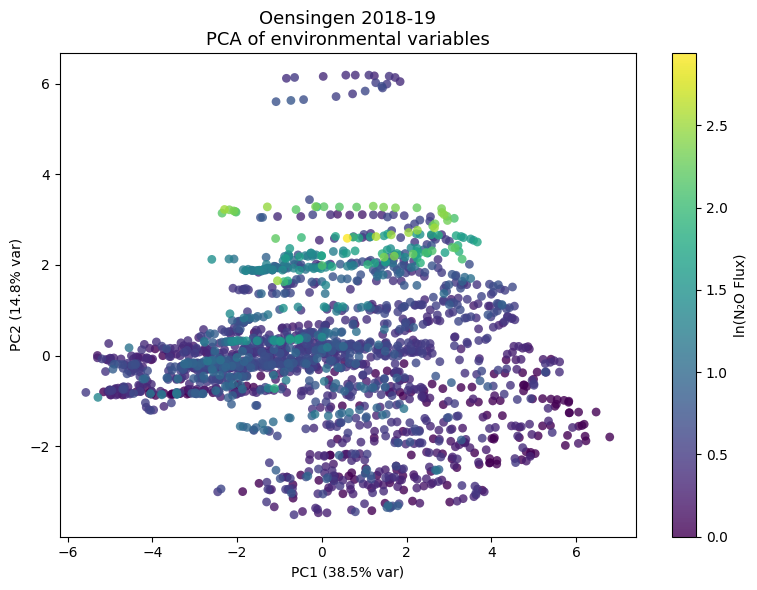

In [13]:
import matplotlib.cm as cm

# --- transformation ---
oensingen_1_clean["N2O_Flux_ln"] = np.where(
    oensingen_1_clean["N2O_Flux"] > 0,
    np.log1p(oensingen_1_clean["N2O_Flux"]),
    0
)

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral", "SoilCultivation"
]

def plot_pca(df, title):
    # Drop rows with missing values in required columns
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()
    
    # Standardize variables
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])
    
    # Run PCA
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(X_scaled)
    df_clean["PC1"] = pcs[:, 0]
    df_clean["PC2"] = pcs[:, 1]

    # Sort by N2O_Flux (so larger appear on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["PC1"], df_clean["PC2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    # Labels and aesthetics
    ax.set_title(f"{title}\nPCA of environmental variables", fontsize=13)
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for oensingen 2018-19
# =============================================
plot_pca(oensingen_1_clean, "Oensingen 2018-19")

## Oensingen 2021-23

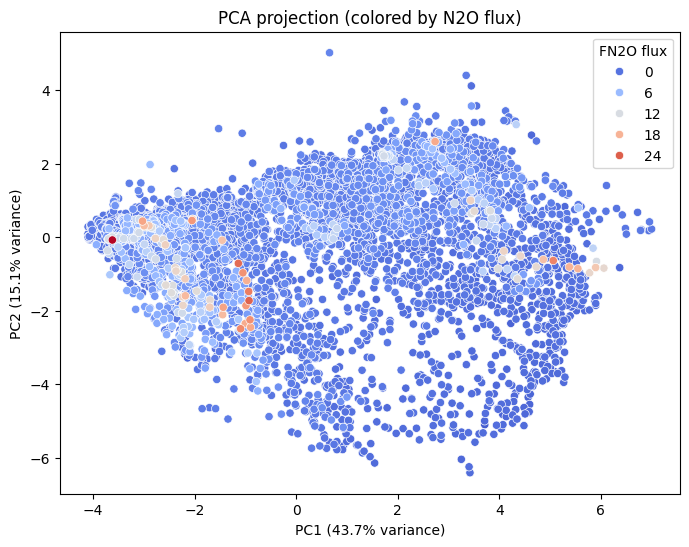

In [14]:
oensingen_2_clean = oensingen_2.dropna()
oensingen_2_clean = oensingen_2_clean.sort_values(
    by="N2O_Flux",
    ascending=True  # ascending puts zeros first, descending puts them last
)

X_2 = oensingen_2_clean.drop(columns=["N2O_Flux", "Timestamp", "time_diff", "Date"])
y_2 = oensingen_2_clean["N2O_Flux"]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize predictors
X_scaled_2 = StandardScaler().fit_transform(X_2)

# Run PCA (2 components for visualization)
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled_2)

# Create DataFrame for plotting
pca_df_2 = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
pca_df_2["FN2O"] = y_2.values

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df_2, x="PC1", y="PC2", hue="FN2O", palette="coolwarm")
plt.title("PCA projection (colored by N2O flux)")
plt.xlabel(f"PC1 ({pca_2.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca_2.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="FN2O flux", loc="best")
plt.show()

In [39]:
loadings = pd.DataFrame(
    pca_2.components_.T,
    index=X_2.columns,
    columns=["PC1", "PC2"]
)
print(loadings.sort_values("PC1", ascending=False))

                        PC1       PC2
SoilTemp_5cm       0.346798  0.087993
AirTemp            0.341171 -0.026435
SoilTemp_15cm      0.334896  0.146334
SoilTemp_30cm      0.331780  0.150520
RECO               0.303709 -0.201747
VPD                0.287503 -0.096598
SolarRadiation     0.215587 -0.402537
GPP                0.139924 -0.530525
SoilCultivation    0.027394  0.055692
Mowing             0.024060  0.051282
FertilizerMineral -0.006779 -0.047263
FertilizerOrganic -0.008062  0.022326
Precipitation     -0.033997  0.107388
NEE               -0.078321  0.572483
SoilWater_15cm    -0.301726 -0.174242
SoilWater_30cm    -0.307155 -0.208803
SoilWater_5cm     -0.325628 -0.179643


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


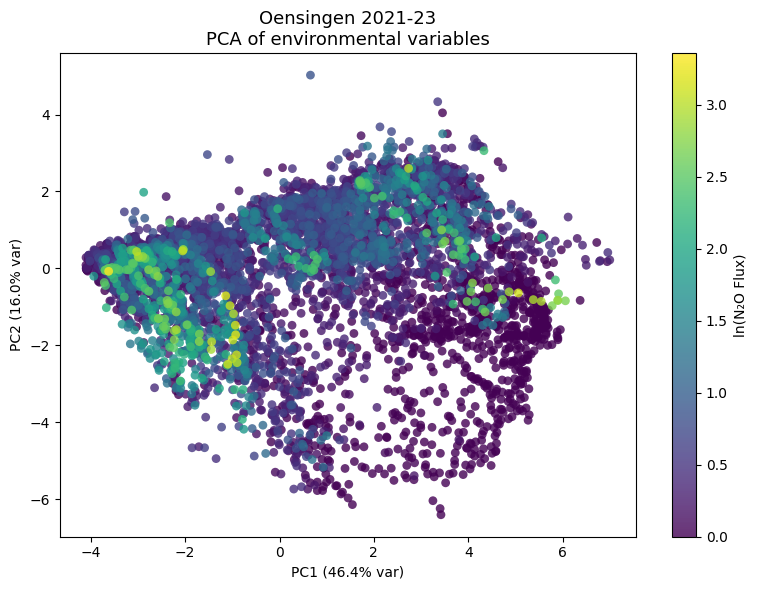

In [15]:
import matplotlib.cm as cm

# --- transformation ---
oensingen_2_clean["N2O_Flux_ln"] = np.where(
    oensingen_2_clean["N2O_Flux"] > 0,
    np.log1p(oensingen_2_clean["N2O_Flux"]),
    0
)

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral", "SoilCultivation"
]

def plot_pca(df, title):
    # Drop rows with missing values in required columns
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()
    
    # Standardize variables
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])
    
    # Run PCA
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(X_scaled)
    df_clean["PC1"] = pcs[:, 0]
    df_clean["PC2"] = pcs[:, 1]

    # Sort by N2O_Flux (so larger appear on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["PC1"], df_clean["PC2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    # Labels and aesthetics
    ax.set_title(f"{title}\nPCA of environmental variables", fontsize=13)
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for oensingen 2021-23
# =============================================
plot_pca(oensingen_2_clean, "Oensingen 2021-23")

# UMAP plots

## Oensingen 2018-19

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


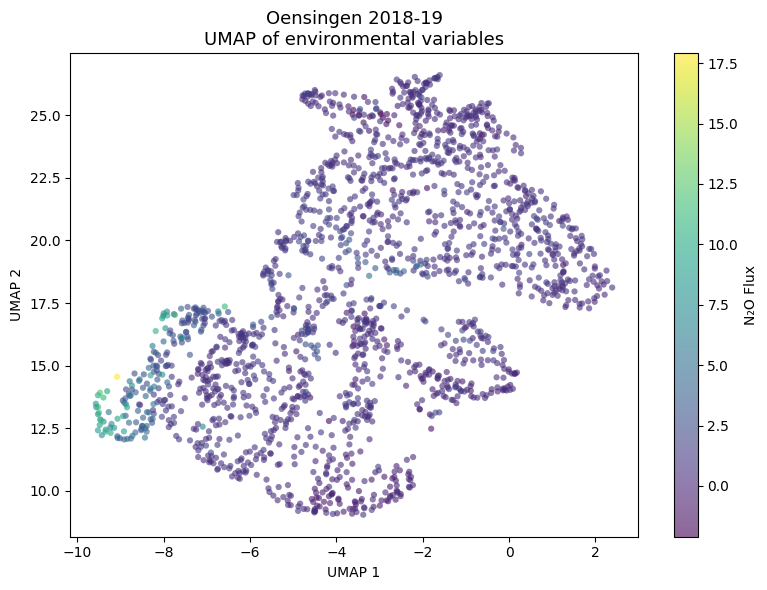

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral", "SoilCultivation"
]


def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("N₂O Flux")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for Oensingen 2018-19
# =============================================
plot_umap(oensingen_1_clean, "Oensingen 2018-19")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


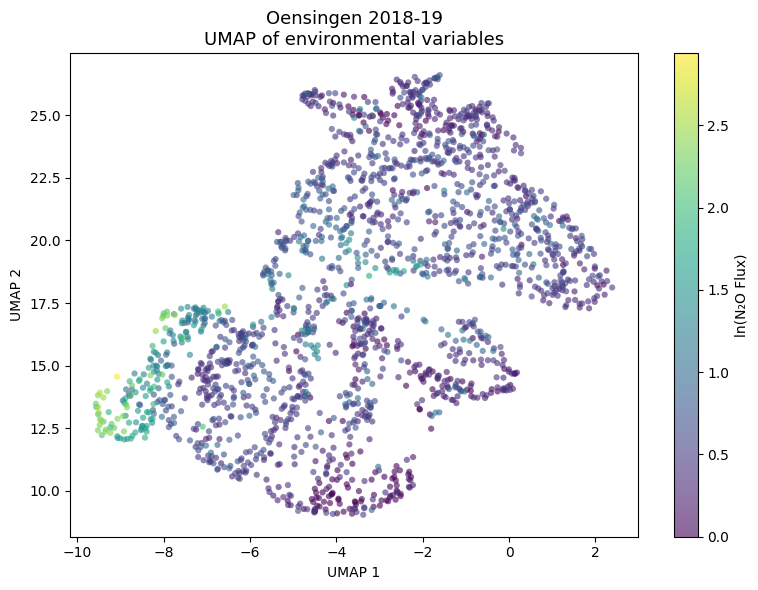

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral", "SoilCultivation"
]


def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for Oensingen 2018-19
# =============================================
plot_umap(oensingen_1_clean, "Oensingen 2018-19")

## Oensingen 2021-23

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


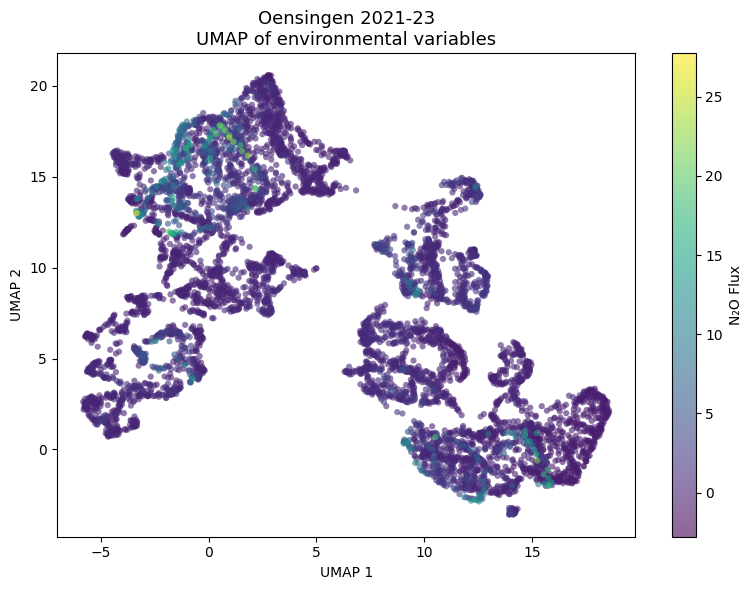

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral", "SoilCultivation"
]


def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("N₂O Flux")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for Oensingen 2021-23
# =============================================
plot_umap(oensingen_2_clean, "Oensingen 2021-23")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


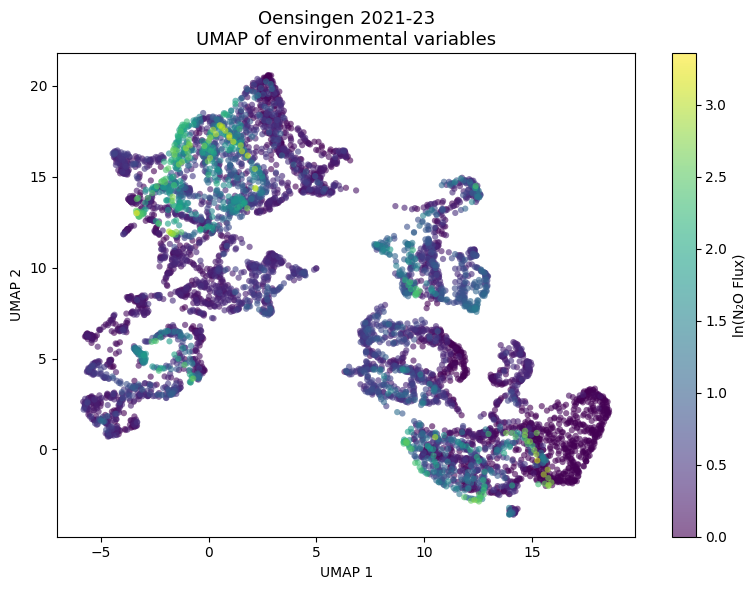

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral", "SoilCultivation"
]


def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for Oensingen 2021-23
# =============================================
plot_umap(oensingen_2_clean, "Oensingen 2021-23")

# t-SNE plots

## Oensingen 2018-19

In [40]:
from sklearn.preprocessing import StandardScaler

# Drop or fill NaNs
X_1 = X_1.dropna()
y_1 = y_1.loc[X_1.index]

# Scale predictors
X_scaled_1 = StandardScaler().fit_transform(X_1)

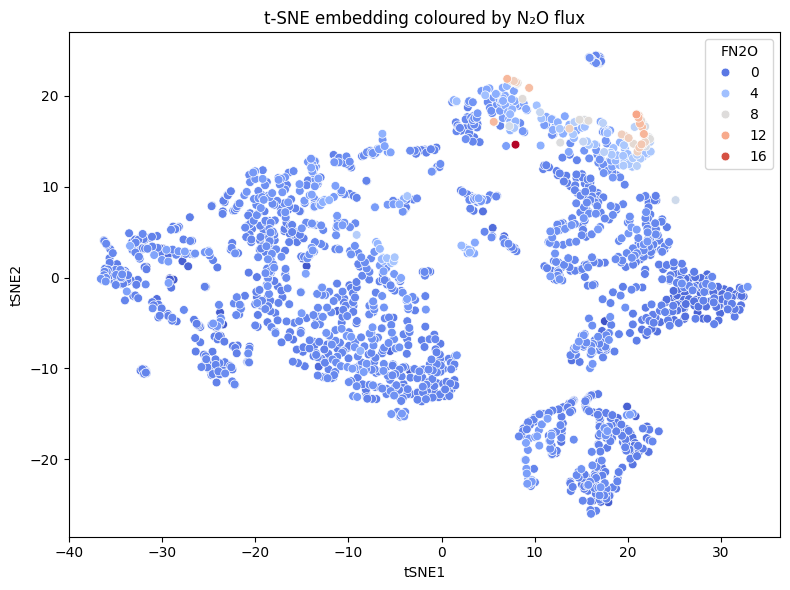

In [31]:
from sklearn.manifold import TSNE

tsne_1 = TSNE(n_components=2, perplexity=90, random_state=42)
X_tsne_1 = tsne_1.fit_transform(X_scaled_1)

tsne_df_1 = pd.DataFrame(X_tsne_1, columns=["tSNE1", "tSNE2"])
tsne_df_1["FN2O"] = y_1.values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df_1, x="tSNE1", y="tSNE2",
    hue="FN2O", palette="coolwarm", s=40
)
plt.title("t-SNE embedding coloured by N₂O flux")
plt.tight_layout()
plt.show()

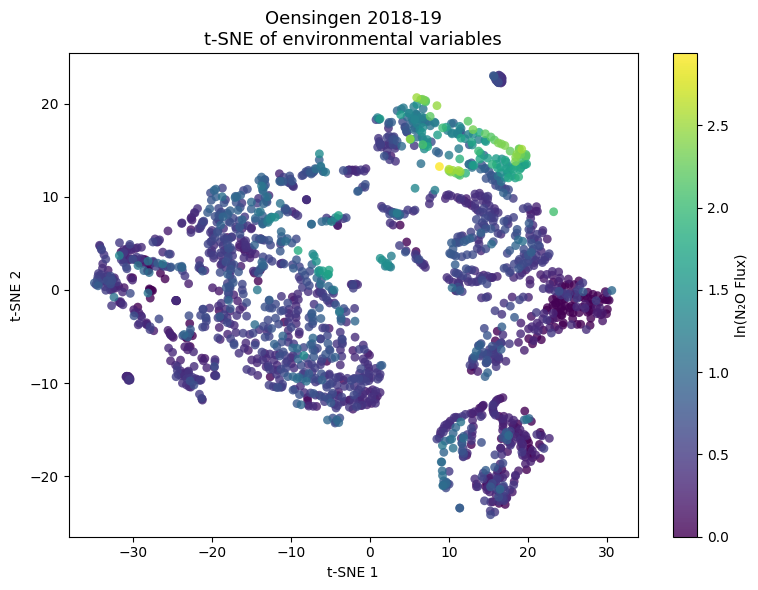

In [32]:
# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral", "SoilCultivation"
]

def plot_tsne(df, title, perplexity=100, learning_rate=200, random_state=42):
    # Drop missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize features
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run t-SNE
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate=learning_rate,
        init="pca",
        random_state=random_state
    )
    tsne_results = tsne.fit_transform(X_scaled)

    df_clean["tSNE1"] = tsne_results[:, 0]
    df_clean["tSNE2"] = tsne_results[:, 1]

    # Sort by N2O_Flux for plotting order
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["tSNE1"], df_clean["tSNE2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    ax.set_title(f"{title}\nt-SNE of environmental variables", fontsize=13)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for Oensingen 2018-19
# =============================================
plot_tsne(oensingen_1_clean, "Oensingen 2018-19")

## Oensingen 2021-23

In [42]:
from sklearn.preprocessing import StandardScaler

# Drop or fill NaNs
X_2 = X_2.dropna()
y_2 = y_2.loc[X_2.index]

# Scale predictors
X_scaled_2 = StandardScaler().fit_transform(X_2)

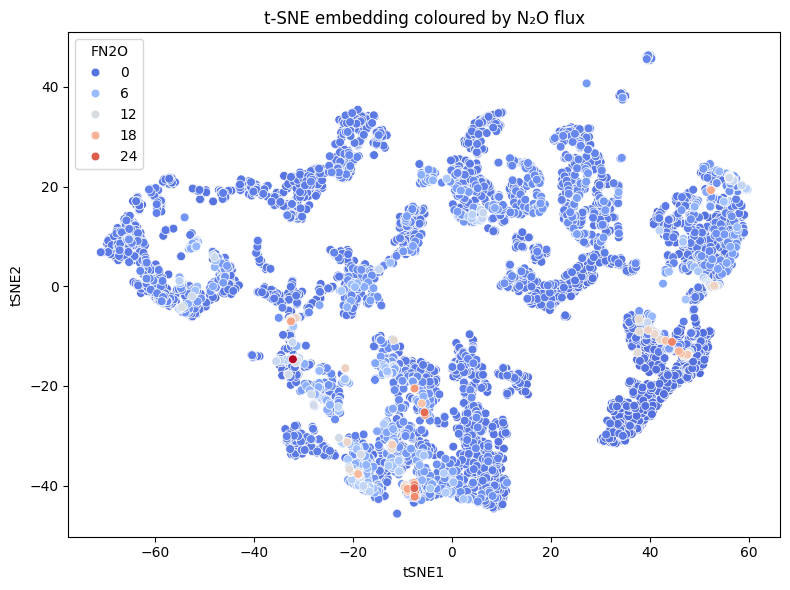

In [33]:
from sklearn.manifold import TSNE

tsne_2 = TSNE(n_components=2, perplexity=90, random_state=42)
X_tsne_2 = tsne_2.fit_transform(X_scaled_2)

tsne_df_2 = pd.DataFrame(X_tsne_2, columns=["tSNE1", "tSNE2"])
tsne_df_2["FN2O"] = y_2.values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df_2, x="tSNE1", y="tSNE2",
    hue="FN2O", palette="coolwarm", s=40
)
plt.title("t-SNE embedding coloured by N₂O flux")
plt.tight_layout()
plt.show()

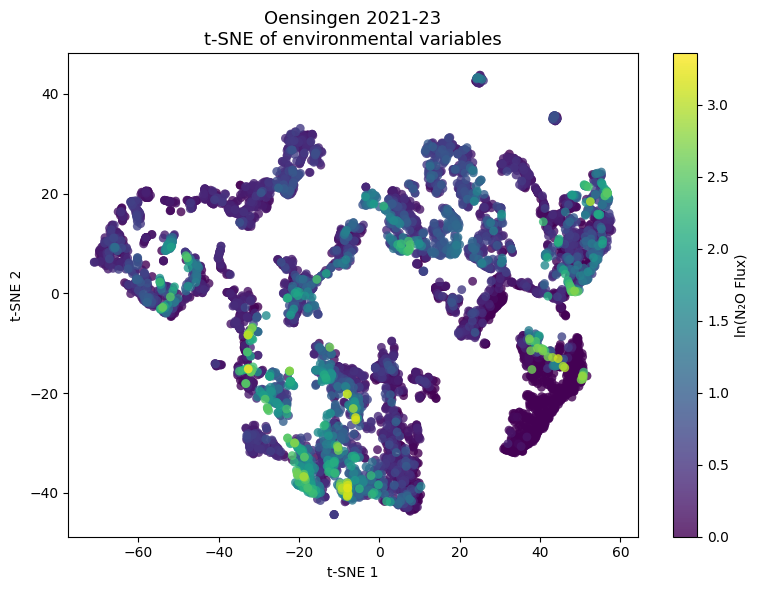

In [34]:
# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing", "FertilizerMineral", "SoilCultivation"
]

def plot_tsne(df, title, perplexity=100, learning_rate=200, random_state=42):
    # Drop missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize features
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run t-SNE
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate=learning_rate,
        init="pca",
        random_state=random_state
    )
    tsne_results = tsne.fit_transform(X_scaled)

    df_clean["tSNE1"] = tsne_results[:, 0]
    df_clean["tSNE2"] = tsne_results[:, 1]

    # Sort by N2O_Flux for plotting order
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["tSNE1"], df_clean["tSNE2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    ax.set_title(f"{title}\nt-SNE of environmental variables", fontsize=13)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for Oensingen 2021-23
# =============================================
plot_tsne(oensingen_2_clean, "Oensingen 2021-23")